# Projet 5 : Segmentez des clients d'un site e-commerce

Problématique principale

- Comprendre les différents types d'utilisateurs du site Olist,  grâce à leur comportement et à leurs données personnelles

Objectifs de l'etude  :

- Proposer une segmentation de clients pour le site Olist

- Evaluer la fréquence de mise à jour de cette
segmentation en vue d’établir un contrat de
maintenance



Projet : https://openclassrooms.com/fr/projects/630/assignment

 Sources des données : https://www.kaggle.com/olistbr/brazilian-ecommerce

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Chargement des librairies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sklearn

**1.Lecture des données**

1.1 Données sur les clients:

In [ ]:
downloaded = drive.CreateFile({'id':'11dDyhjZtxBJssT-Qnej91GiZ126mW4FM'})
downloaded.GetContentFile('olist_customers_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')

1.2 Données sur la géolocalisation :

In [ ]:
downloaded = drive.CreateFile({'id':'17ep04na7hPs4PoDWreMgo75oOszzJ4VR'})
downloaded.GetContentFile('olist_geolocation_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')

1.3 Données sur les items :

In [ ]:
downloaded = drive.CreateFile({'id':'1GWaWsvLrNr2LkEFhYP5h0rP1szKupo-e'})
downloaded.GetContentFile('olist_order_items_dataset.csv')
order_items= pd.read_csv('olist_order_items_dataset.csv')

1.4 Données sur les payments:

In [ ]:
downloaded = drive.CreateFile({'id':'1wOhjylQvXmfiNzeAuQxF0SIj650Y6d0C'})
downloaded.GetContentFile('olist_order_payments_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')

1.5 Données sur l'évaluation des produits:

In [ ]:
downloaded = drive.CreateFile({'id':'1L85mD174hYdKqsVb0koUEyVHioC_Nd8o'})
downloaded.GetContentFile('olist_order_reviews_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')

1.6 Données sur les achats:

In [ ]:
downloaded = drive.CreateFile({'id':'1nvWj9cUM7QGjHIC55YGRwufkI1U1xvSX'})
downloaded.GetContentFile('olist_orders_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')

1.7 Données sur les produits:

In [ ]:
downloaded = drive.CreateFile({'id':'1pRpa7iVdUQVSV0yhziktD6K7Kf3tqMSV'})
downloaded.GetContentFile('olist_products_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

1.8 Données sur les vendeurs:

In [ ]:
downloaded = drive.CreateFile({'id':'10O6BhZGzqWMN4cum11b1QKaHOBwVe2Ci'})
downloaded.GetContentFile('olist_sellers_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

1.9 Données sur les catégories des produits (translation):

In [ ]:
downloaded = drive.CreateFile({'id':'1mNt4h8AlNUT9oHXQSI79mRQo-UXu3pI2'})
downloaded.GetContentFile('product_category_name_translation.csv')
translation= pd.read_csv('product_category_name_translation.csv')

Le jeu de données est compose de 8 datasets, dont un dataset supplementaire sur la traduction de la categorie des produits

Le schémas ci-dessous permet de comprendre comment sont reliés ces datasets: 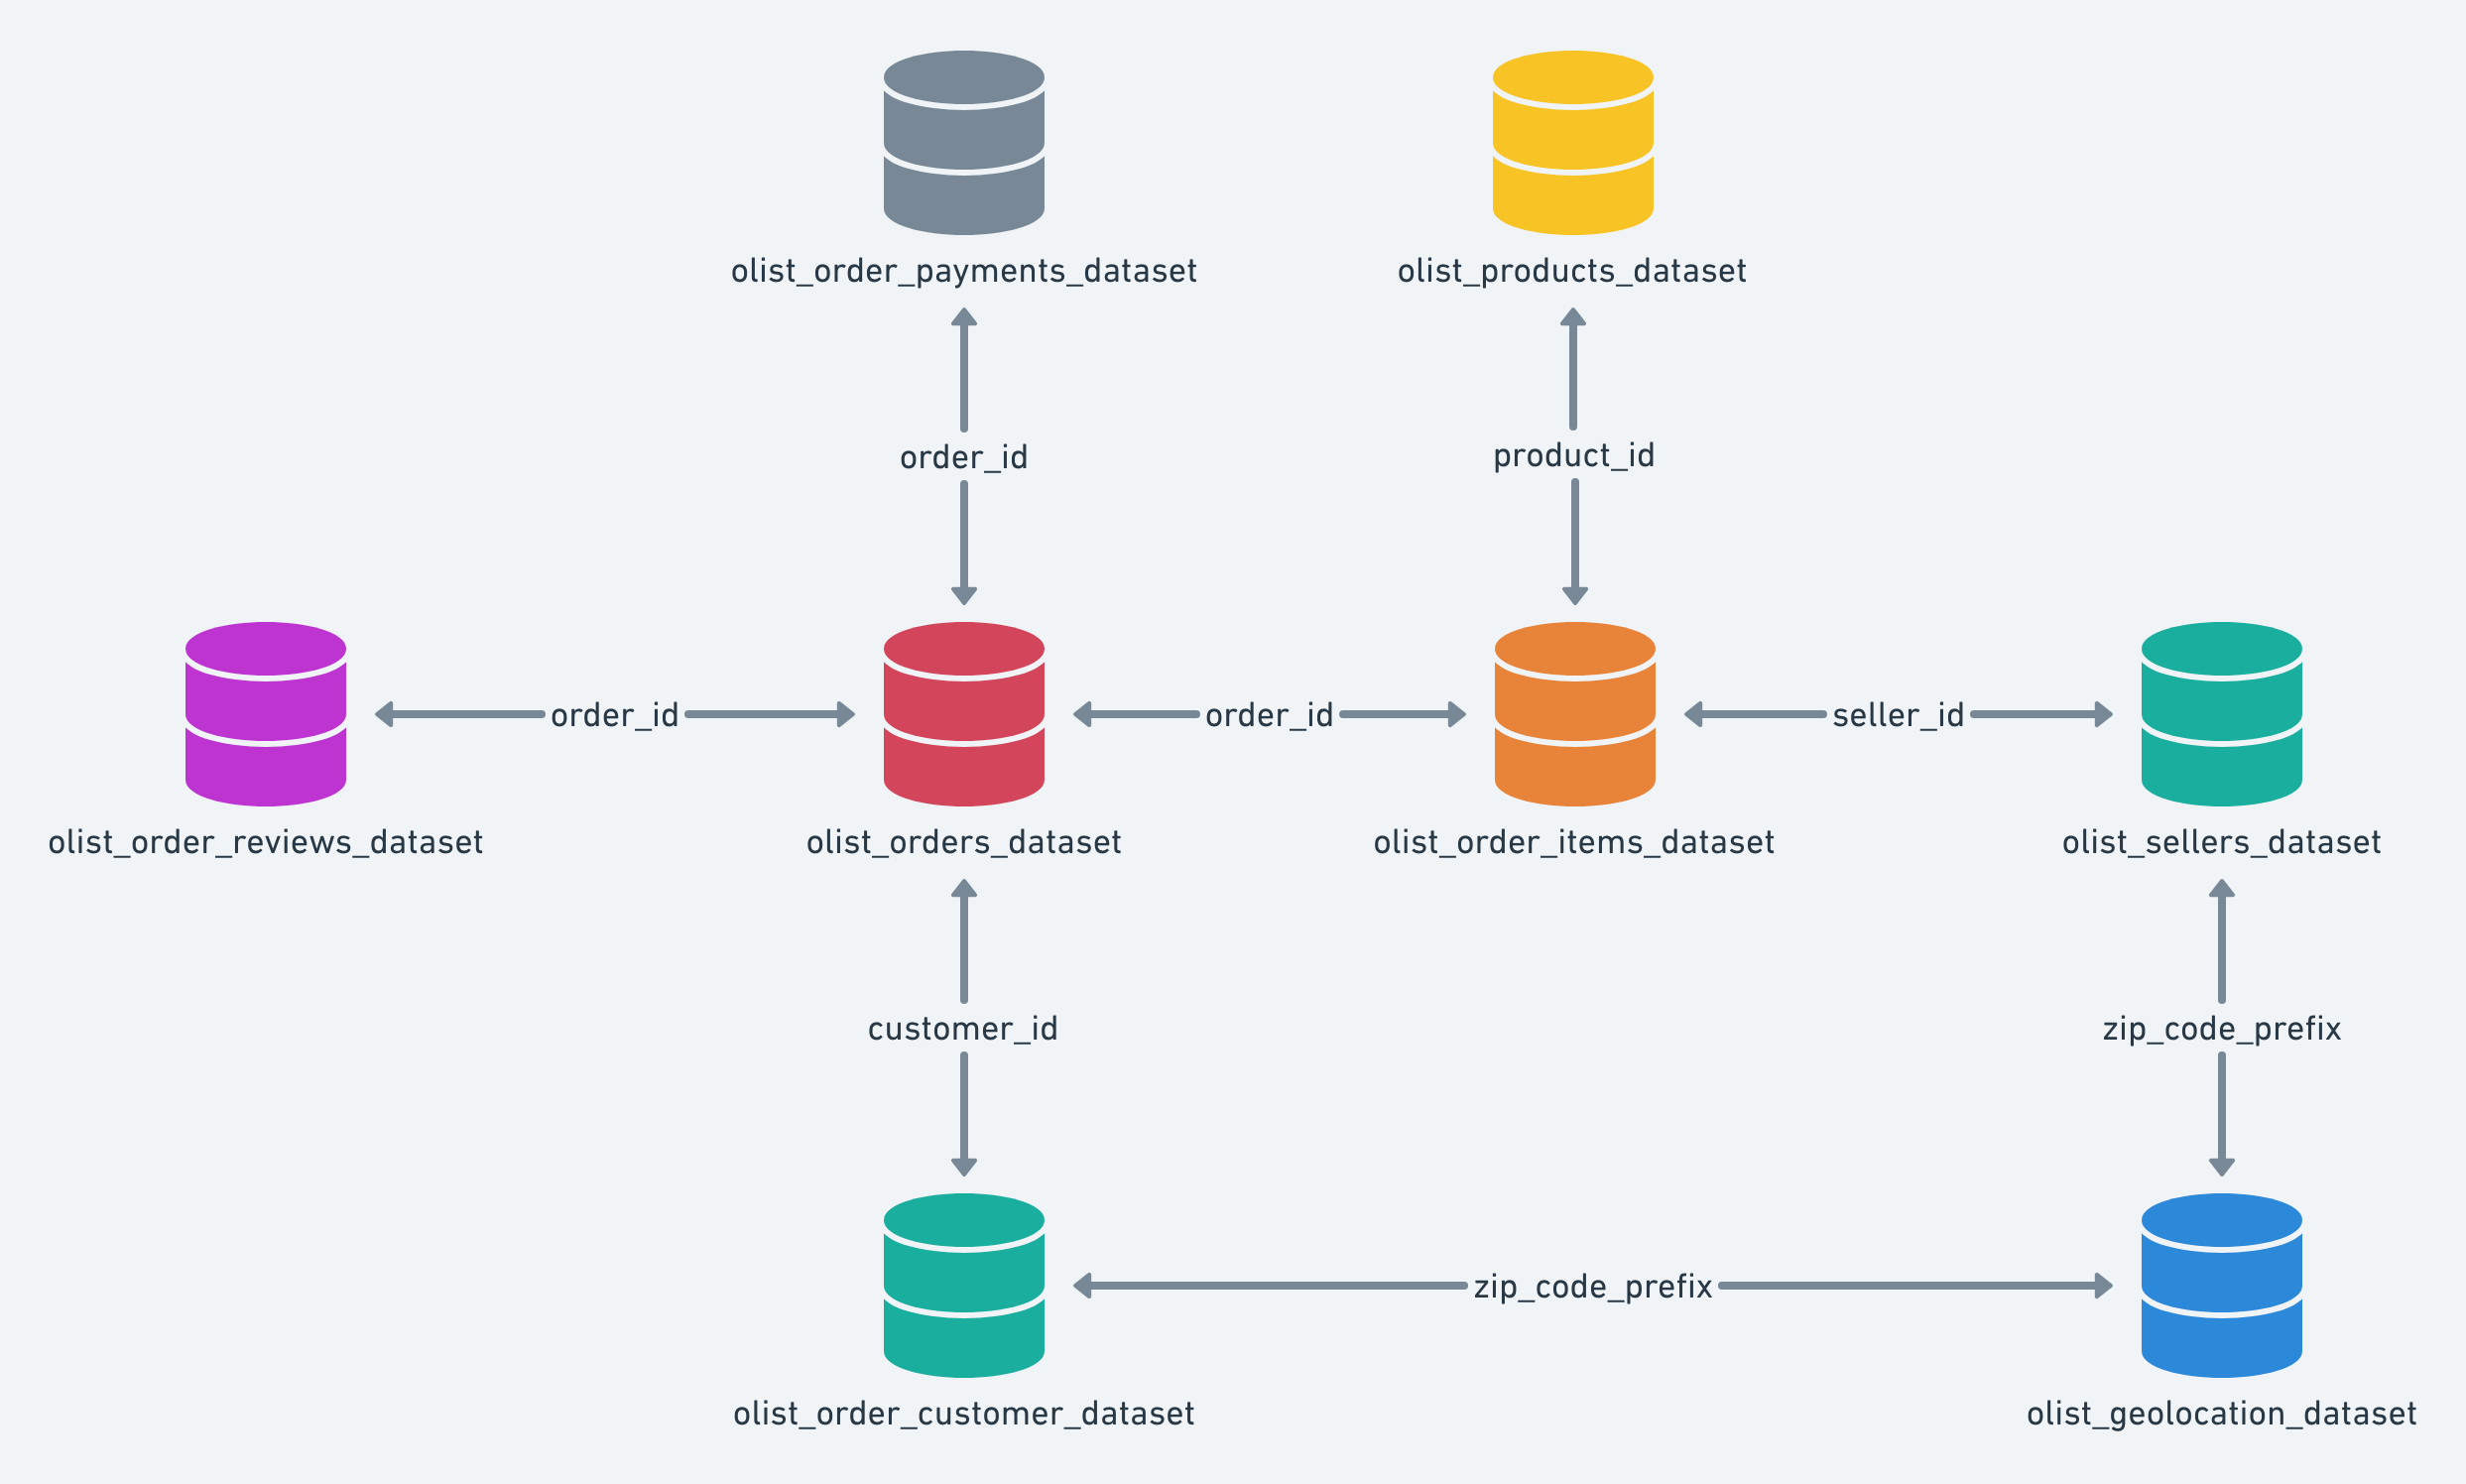

**2.Contenu et Observation des données :**

Données sur les payments :

In [ ]:
order_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


- 'payment_type' : moyen de paiment
- 'payment_installments': payée en plusieurs fois
- 'payment_sequential': payée en utilisant plusieurs moyen

In [ ]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Il n'y a pas de valeur manquante


In [ ]:
#type de paiement :
order_payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

- le type voucher :'bon d'achats'
- le type boleto :payment en espèce

In [ ]:
order_payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

Text(0.5, 1.0, 'proportion de chaque types de paiement ')

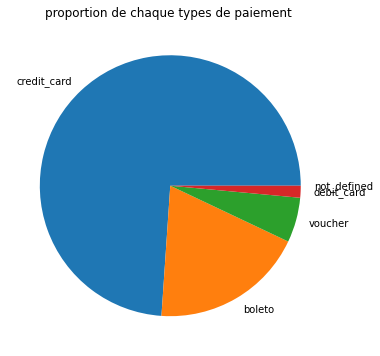

In [ ]:
# Pieplot de la répartition des catégories type de paiements
plt.figure(figsize=(6,6))
plt.pie(order_payments['payment_type'].value_counts().values,labels=order_payments['payment_type'].value_counts().index)
plt.title('proportion de chaque types de paiement ')

- le type de paiment le plus utilise est par carte de crédit

In [ ]:
order_payments.loc[order_payments['payment_type'] == 'not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [ ]:
orders.loc[(orders.order_id=='4637ca194b6387e2d538dc89b124b0ee')|(orders.order_id=='00b1cb0320190ca0daa2c88b35206009')|(orders.order_id=='c8c528189310eaa44a745b8d9d26908b')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
39919,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,NaN,NaN,NaN,2018-09-10 00:00:00
40235,c8c528189310eaa44a745b8d9d26908b,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,NaN,NaN,NaN,2018-09-11 00:00:00


 Not_defined payment_type correspond aux commandes annulées

In [ ]:
 order_payments = order_payments.loc[~(order_payments['payment_type']=='not_defined')]

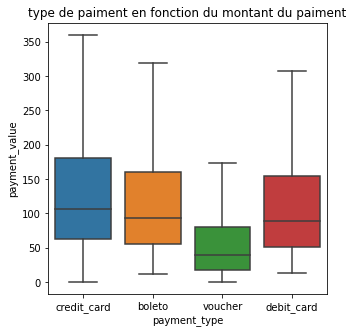

In [ ]:
plt.figure(figsize=(5,5))
plt.title("type de paiment en fonction du montant du paiment")
sns.boxplot(data=order_payments, y="payment_value",x="payment_type", showfliers=False)
plt.show()

In [ ]:
order_payments.loc[order_payments['payment_installments']<2,'payment_installments']=0
order_payments.loc[order_payments['payment_installments']>=2,'payment_installments']=1
order_payments= order_payments.rename(columns={'payment_installments':'multi_payment'})

In [ ]:
Categ_payment = {
"credit_card": "Carte_bancaire",
"debit_card": "Carte_bancaire"
}

In [ ]:
order_payments['payment_type']=order_payments['payment_type'].replace(Categ_payment)

In [ ]:
order_payments['payment_type'].unique()

array(['Carte_bancaire', 'boleto', 'voucher'], dtype=object)

One hot encoding pour le type de paiment

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
ohe = OneHotEncoder(sparse=False)
col_ohe = ['payment_type']
transformed = ohe.fit_transform(order_payments[col_ohe])
data= pd.DataFrame(transformed,columns=ohe.get_feature_names().tolist())
order_payments.reset_index(inplace=True)
order_payments= order_payments.drop(['payment_type'],axis=1)
#concat with the original data
order_payments= pd.concat([order_payments,data],axis=1)

In [ ]:
order_payments.head(3)

,index,order_id,payment_sequential,multi_payment,payment_value,x0_Carte_bancaire,x0_boleto,x0_voucher
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,1,99.33,1.0,0.0,0.0
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,0,24.39,1.0,0.0,0.0
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,0,65.71,1.0,0.0,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'boxplot for payment value per order')

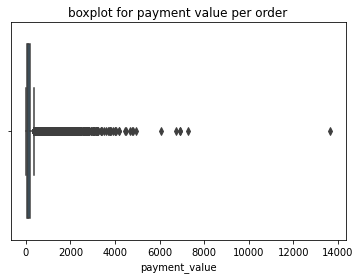

In [ ]:
sns.boxplot(order_payments['payment_value'])
plt.title('boxplot for payment value per order')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution for payment value per order')

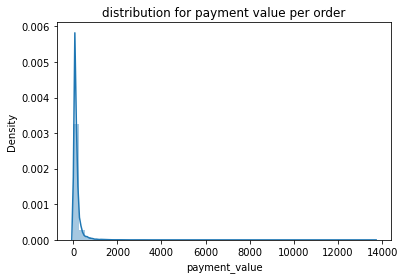

In [ ]:
sns.distplot(order_payments["payment_value"])
plt.title('distribution for payment value per order')

Données sur les items

In [ ]:
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


- order_item_id : est le nombre de produits dans une meme commande
- freight_value : frais de livraison

In [ ]:
#calculer le montant total dépensé par client par facture
#df_prices = order_items.loc[:, ["order_id", "price", "freight_value"]]
#On calcule la moyenne des dépenses
#df_prices = df_prices.groupby(["order_id"], as_index=False).mean()

In [ ]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Il n'y a pas de valeur manquante

Text(0.5, 1.0, "Nombre d'articles dans une même commande")

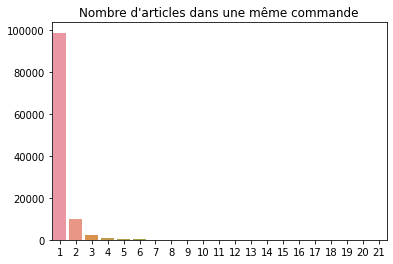

In [ ]:
sns.barplot(x=order_items['order_item_id'].value_counts().index,y= order_items['order_item_id'].value_counts().values)
plt.title('Nombre d\'articles dans une même commande')

La plus grande majorité des commande comporte un seul article

prix et cout de livraison

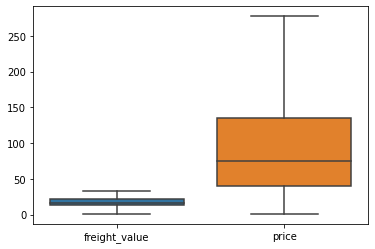

In [ ]:
sns.boxplot(data=order_items, order=["freight_value", "price"],showfliers=False)

Données sur la géolocalisation

In [ ]:
geolocation.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [ ]:
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Il n'y a pas de valeur manquante

In [ ]:
geolocation["geolocation_state"].unique()

array(['SP', 'RN', 'AC', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB',
       'CE', 'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'RS', 'PR', 'SC'], dtype=object)

In [ ]:
loc_dict = {
#centre ouest
"DF": "centre_ouest",
"GO": "centre_ouest",
"MS": "centre_ouest",
"MT": "centre_ouest",
# nord est
"MA": "nord_est",
"PI": "nord_est",
"RN": "nord_est",
"PB": "nord_est",
"CE": "nord_est",
"AL": "nord_est",
"PE": "nord_est",
"SE": "nord_est",
"BA": "nord_est",
#nord
"AC": "nord",
"AM": "nord",
"RO": "nord",
"RR": "nord",
"PA": "nord",
"AP": "nord",
"TO": "nord",
#sud est
"MG": "sud_est",
"ES": "sud_est",
"RJ": "sud_est",
"SP": "sud_est",
#sud
"PR": "sud",
"SC": "sud",
"RS": "sud"
}

In [ ]:
geolocation['geolocation_state'] = geolocation['geolocation_state'].replace(loc_dict)

In [ ]:
geolocation["geolocation_state"].unique()

array(['sud_est', 'nord_est', 'nord', 'centre_ouest', 'sud'], dtype=object)

In [ ]:
geolocation.rename(columns={"geolocation_zip_code_prefix": "zip_code_prefix"}, inplace=True)

In [ ]:
geolocation.rename(columns={"geolocation_state": "geolocation_region"}, inplace=True)

In [ ]:
geolocation.head(3)

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_region
0,1037,-23.545621,-46.639292,sao paulo,sud_est
1,1046,-23.546081,-46.644820,sao paulo,sud_est
2,1046,-23.546129,-46.642951,sao paulo,sud_est


Données sur les vendeurs

In [ ]:
sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [ ]:
#Nombre de vendeurs
sellers['seller_id'].nunique()

3095

In [ ]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Il n'y a pas de valeur manquante

Données sur les clients

In [ ]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


nombre de clients :

In [ ]:
customers['customer_unique_id'].nunique()

96096

In [ ]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Il n'y a pas de valeur manquante

In [ ]:
customers.rename(columns={"customer_zip_code_prefix": "zip_code_prefix"}, inplace=True)

In [ ]:
customers['customer_state'].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

Text(0.5, 1.0, 'Number of customer per region')

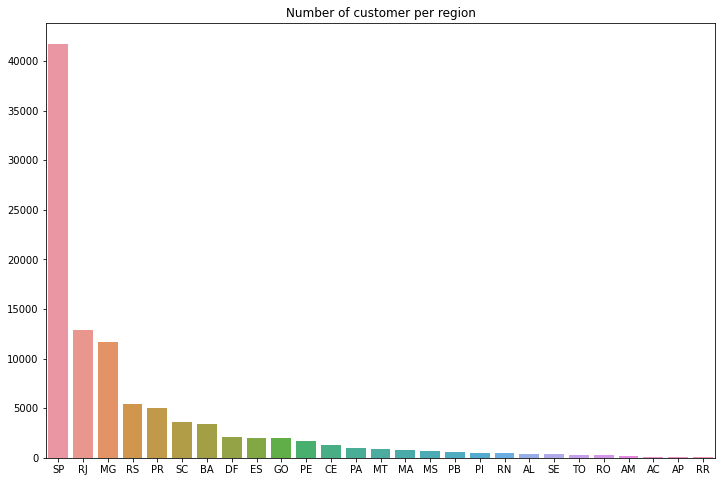

In [ ]:
plt.figure(figsize=[12,8])
sns.barplot(x=customers['customer_state'].value_counts().index,y=customers['customer_state'].value_counts().values)
plt.title('Number of customer per region')

In [ ]:
customers['customer_state'] =customers['customer_state'].replace(loc_dict)

In [ ]:
customers['customer_state'].unique()

array(['sud_est', 'sud', 'nord', 'centre_ouest', 'nord_est'], dtype=object)

In [ ]:
customers.rename(columns={"customer_state": "customer_region"}, inplace=True)

Text(0.5, 1.0, 'Number of customer per region')

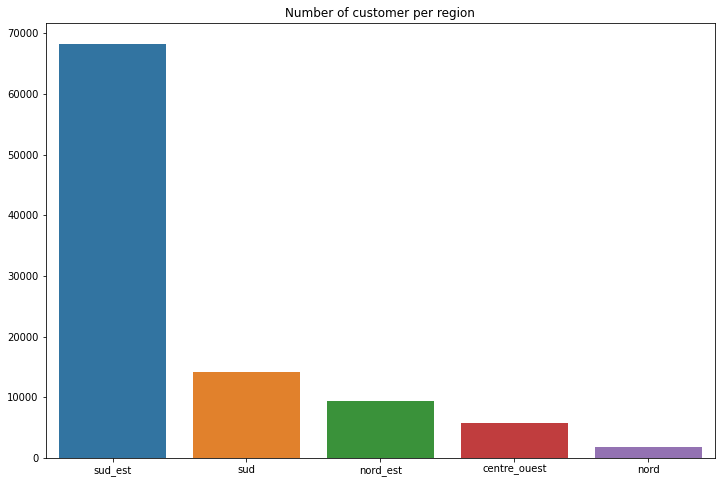

In [ ]:
plt.figure(figsize=[12,8])
sns.barplot(x=customers['customer_region'].value_counts().index,y=customers['customer_region'].value_counts().values)
plt.title('Number of customer per region')

In [ ]:
customers = pd.get_dummies(customers,columns=['customer_region'])

In [ ]:
customers.head(3)

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_region_centre_ouest,customer_region_nord,customer_region_nord_est,customer_region_sud,customer_region_sud_est
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,0,0,0,0,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,0,0,0,0,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,0,0,0,0,1


Données sur l'évaluation des produits par les clients

In [ ]:
order_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [ ]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Les valeurs manquantes sont les commentaires manquants à des commandes et les titres de ces commentaires

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'nombre de commandes par score')

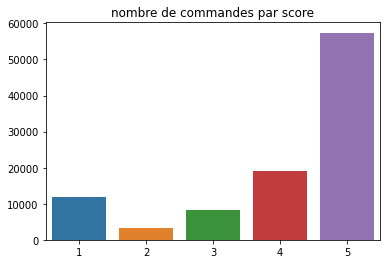

In [ ]:
#nombre de commandes par score
sns.barplot(order_reviews["review_score"].value_counts().index, order_reviews["review_score"].value_counts().values)
plt.title('nombre de commandes par score')

La majorite des produits sont scorées 5

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution pour review score')

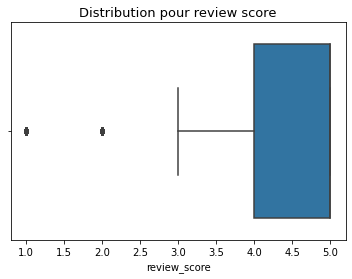

In [ ]:
sns.boxplot(order_reviews["review_score"])
plt.title('Distribution pour review score',fontsize=13)

Données sur les catégories des produits (translation)

In [ ]:
translation.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [ ]:
translation.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

Il n'y a pas de valeur manquante

nombre de catégories

In [ ]:
translation['product_category_name'].nunique()

71

In [ ]:
# Create a dictionnary to translate product category name into english names
dict_translation= pd.Series(translation.product_category_name_english.values,index=translation.product_category_name).to_dict()

In [ ]:
dict_translation

{'agro_industria_e_comercio': 'agro_industry_and_commerce',
 'alimentos': 'food',
 'alimentos_bebidas': 'food_drink',
 'artes': 'art',
 'artes_e_artesanato': 'arts_and_craftmanship',
 'artigos_de_festas': 'party_supplies',
 'artigos_de_natal': 'christmas_supplies',
 'audio': 'audio',
 'automotivo': 'auto',
 'bebes': 'baby',
 'bebidas': 'drinks',
 'beleza_saude': 'health_beauty',
 'brinquedos': 'toys',
 'cama_mesa_banho': 'bed_bath_table',
 'casa_conforto': 'home_confort',
 'casa_conforto_2': 'home_comfort_2',
 'casa_construcao': 'home_construction',
 'cds_dvds_musicais': 'cds_dvds_musicals',
 'cine_foto': 'cine_photo',
 'climatizacao': 'air_conditioning',
 'consoles_games': 'consoles_games',
 'construcao_ferramentas_construcao': 'construction_tools_construction',
 'construcao_ferramentas_ferramentas': 'costruction_tools_tools',
 'construcao_ferramentas_iluminacao': 'construction_tools_lights',
 'construcao_ferramentas_jardim': 'costruction_tools_garden',
 'construcao_ferramentas_segura

Données sur les produits

In [ ]:
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [ ]:
products.shape

(32951, 9)

In [ ]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

nombre de catégories

In [ ]:
products['product_category_name'].nunique()

73

alors on a 2 catégories non traduites

In [ ]:
products.replace({'product_category_name':dict_translation},inplace=True)

In [ ]:
products['product_category_name'].isna().sum()

610

on a 610 produits dont lesquels il manque la catégorie de produit

In [ ]:
products['product_category_name']=products['product_category_name'].replace({np.nan:'Unknown'})

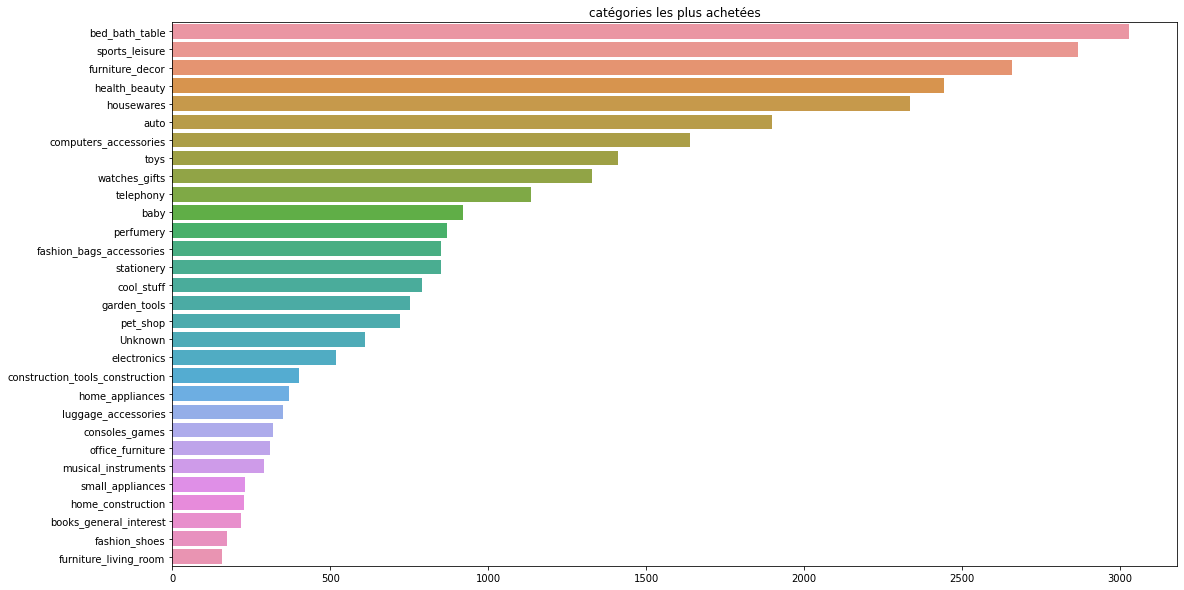

In [ ]:
plt.figure(figsize=(18,10))
sns.barplot(y=products['product_category_name'].value_counts().head(30).index,x=products['product_category_name'].value_counts().head(30).values)
plt.title('catégories les plus achetées')
plt.show()

In [ ]:
# Nombre de produits achetés dans chaque catégorie
products_count_per_category = products['product_category_name'].value_counts()

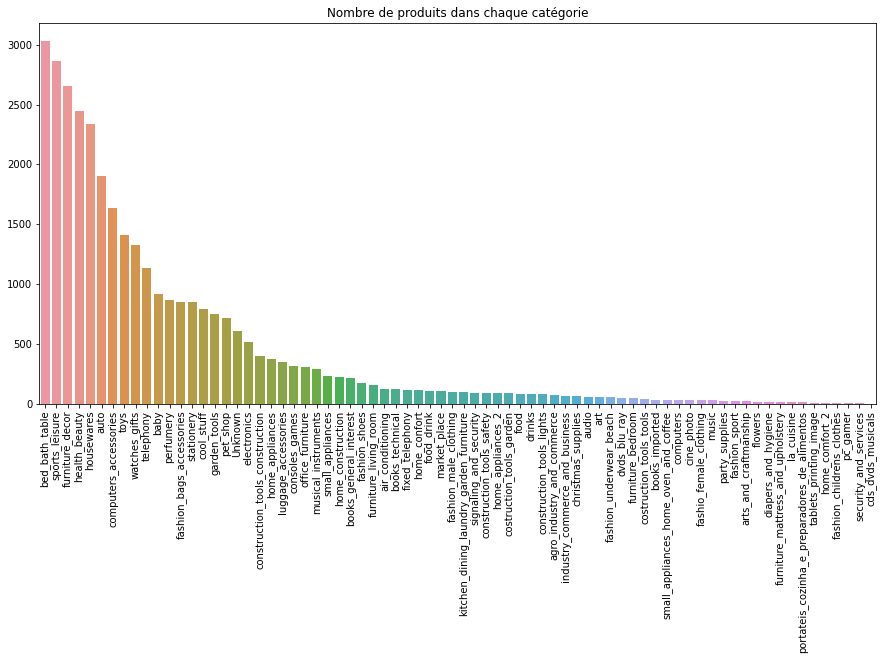

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=products_count_per_category.index,y=products_count_per_category.values)
plt.xticks(rotation=90)
plt.title('Nombre de produits dans chaque catégorie')
plt.show()

In [ ]:
products['product_category_name'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'Unknown', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
     

In [ ]:
categ_dict = {
#home
'furniture_living_room' : 'home',
'furniture_mattress_and_upholstery' : 'home',
'furniture_bedroom' : 'home',
'furniture_decor' : 'home',
'bed_bath_table' : 'home',
'kitchen_dining_laundry_garden_furniture' : 'home',
'la_cuisine' : 'home',
'home_confort' : 'home',
'home_comfort_2' : 'home',
'christmas_supplies' : 'home',
'housewares':'home',
'portateis_cozinha_e_preparadores_de_alimentos':'home',

#appliances
'small_appliances' : 'appliances',
'small_appliances_home_oven_and_coffee' : 'appliances',
'home_appliances_2' : 'appliances',
'home_appliances' : 'appliances',


#construction
'construction_tools_construction': 'construction',
'costruction_tools_garden': 'construction',
'costruction_tools_tools': 'construction',
'construction_tools_safety': 'construction',
'construction_tools_lights': 'construction',
'home_construction': 'construction',
'air_conditioning': 'construction',


#office
'office_furniture' : 'office',
'industry_commerce_and_business' : 'office',
'stationery' : 'office',
'agro_industry_and_commerce' : 'office',
'signaling_and_security' : 'office',
'security_and_services' : 'office',
#electronics
'telephony' : 'electronics',
'electronics': 'electronics',
'computers_accessories': 'electronics',
'consoles_games': 'electronics',
'fixed_telephony': 'electronics',
'audio': 'electronics',
'computers': 'electronics',
'tablets_printing_image': 'electronics',
'pc_gamer':'electronics',

#books
'books_imported': 'books',
'books_general_interest': 'books',
'books_technical': 'books',
#arts
'art': 'arts',
'cine_photo': 'arts',
'arts_and_craftmanship': 'arts',
#music
'cds_dvds_musicals': 'music',
'music': 'music',
'dvds_blu_ray': 'music',
'musical_instruments':'music',
#baby
'toys': 'baby',
'baby': 'baby',
'diapers_and_hygiene' : 'baby',
#fashion
'watches_gifts' : 'fashion',
'fashion_bags_accessories' : 'fashion',
'fashion_underwear_beach' : 'fashion',
'fashion_shoes' : 'fashion',
'fashion_male_clothing' : 'fashion',
'fashio_female_clothing' : 'fashion',
'fashion_sport' : 'fashion',
'fashion_childrens_clothes' : 'fashion',
'luggage_accessories':'fashion',
#cosmetic
'health_beauty' : 'cosmetic',
'perfumery' : 'cosmetic',
#garden and pets
'flowers' : 'garden_pets',
'pet_shop' : 'garden_pets',
'garden_tools' : 'garden_pets',
#auto
'auto' : 'auto',
#food_drinks
'food_drink' : 'food_drinks',
'food' : 'food_drinks',
'drinks' : 'food_drinks',

#leisure
'sports_leisure' : 'leisure',
'party_supplies': 'leisure',
'cool_stuff':'leisure',

#market_place
'market_place' : 'market_palce'}

In [ ]:
products['product_category_name'] = products['product_category_name'].replace(categ_dict)

In [ ]:
products['product_category_name'].nunique()

17

on a maintenant 17 categories au lieu de 73

In [ ]:
products['product_category_name'].unique()

array(['cosmetic', 'arts', 'leisure', 'baby', 'home', 'music',
       'appliances', 'construction', 'electronics', 'fashion',
       'garden_pets', 'office', 'auto', 'Unknown', 'books', 'food_drinks',
       'market_palce'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

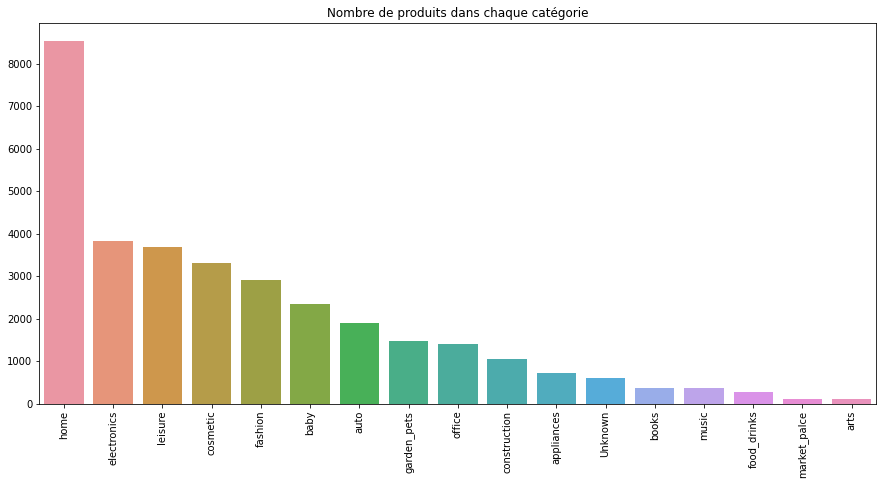

In [ ]:
products_count_per_new_category= products['product_category_name'].value_counts()
plt.figure(figsize=(15,7))
sns.barplot(x=products_count_per_new_category.index,y=products_count_per_new_category.values)
plt.title('Nombre de produits dans chaque catégorie')
plt.xticks(rotation=90)

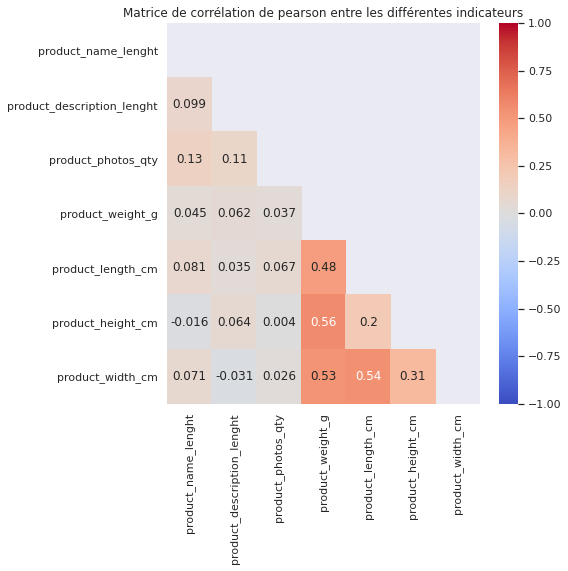

In [ ]:
plt.figure(figsize=(7,7))
sns.set(font_scale=1)
corr = products.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.title('Matrice de corrélation de pearson entre les différentes indicateurs')
sns.heatmap(corr,mask=mask,vmin=-1,vmax=1,cmap='coolwarm',center=0,annot=True)

- product_weight_g est corréles avec :
 - product_length_cm
 - product_height_cm
 - product_width_cm

 alors le poids est corrélé aux dimensions du produit ( au volume du produits)

In [ ]:
#création de nouvelles features : volume
products['product_volume']=products['product_length_cm']*products['product_height_cm']*products['product_width_cm']

In [ ]:
products= products.drop(['product_length_cm','product_height_cm','product_width_cm','product_name_lenght','product_description_lenght','product_photos_qty'],axis=1)

In [ ]:
ohe1 = OneHotEncoder(sparse=False)
colonne_ohe = ['product_category_name']
transformed_products = ohe1.fit_transform(products[colonne_ohe])
data_trans= pd.DataFrame(transformed_products,columns=ohe1.get_feature_names().tolist())
products.reset_index(inplace=True)
products= products.drop(['product_category_name'],axis=1)
#concat with the original data
products= pd.concat([products,data_trans],axis=1)

In [ ]:
products.shape

(32951, 21)

In [ ]:
products.head(3)

,index,product_id,product_weight_g,product_volume,x0_Unknown,x0_appliances,x0_arts,x0_auto,x0_baby,x0_books,x0_construction,x0_cosmetic,x0_electronics,x0_fashion,x0_food_drinks,x0_garden_pets,x0_home,x0_leisure,x0_market_palce,x0_music,x0_office
0,0,1e9e8ef04dbcff4541ed26657ea517e5,225.0,2240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,1000.0,10800.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,96bd76ec8810374ed1b65e291975717f,154.0,2430.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Données sur les commandes

In [ ]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [ ]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
orders.shape

(99441, 8)

In [ ]:
orders.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'],inplace=True)

In [ ]:
orders.shape

(96461, 8)

In [ ]:
orders['order_status'].unique()

array(['delivered', 'canceled'], dtype=object)

In [ ]:
orders['order_status'].value_counts()

delivered    96455
canceled         6
Name: order_status, dtype: int64

In [ ]:
orders = orders.loc[orders['order_status']=='delivered']

In [ ]:
orders.shape

(96455, 8)

In [ ]:
"Il y a {} commandes renseignés.".format(len(orders["order_id"].unique()))

'Il y a 96455 commandes renseignés.'

Délai de livraison actuel et estime



In [ ]:
#Conversion des données dates en datetime
date_columns=['order_delivered_customer_date','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_estimated_delivery_date']
orders[date_columns] = orders[date_columns].astype('datetime64')
#Cacul la difference en jours
orders['delai_actuel'] = orders['order_delivered_customer_date']- orders['order_approved_at']
orders['delai_actuel']=orders['delai_actuel']/ np.timedelta64(1,'D')
orders['delai_estime']=orders['order_estimated_delivery_date']-orders['order_approved_at']
orders['delai_estime']=orders['delai_estime']/ np.timedelta64(1,'D')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056

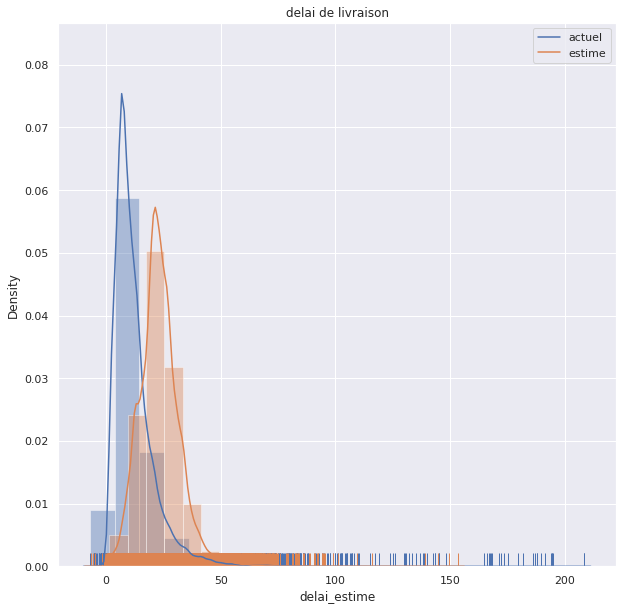

In [ ]:
plt.figure(figsize=(10,10))
plt.title('delai de livraison')
sns.distplot(orders['delai_actuel'], bins=20, rug=True)
sns.distplot(orders['delai_estime'], bins = 20, rug=True)
plt.legend(['actuel', 'estime'])
plt.show()

Le temps estimé est supérieur au temps de livraison actuel

On s'interesse à l'année, le mois, et le jour de l'achat

In [ ]:
orders['order_purchase_year']=orders['order_purchase_timestamp'].dt.strftime('%Y')
orders['order_purchase_month']=orders['order_purchase_timestamp'].dt.strftime('%m')
orders['order_purchase_day']=orders['order_purchase_timestamp'].dt.strftime('%d')
orders['day']= orders['order_purchase_timestamp'].dt.dayofweek

In [ ]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delai_actuel,delai_estime,order_purchase_year,order_purchase_month,order_purchase_day,day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.429144,15.536632,2017,10,02,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.502292,17.858021,2018,07,24,1


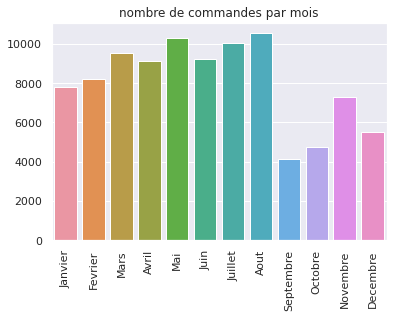

In [ ]:
month= ['Janvier', 'Fevrier', 'Mars', 'Avril','Mai', 'Juin', 'Juillet', 'Aout','Septembre', 'Octobre', 'Novembre', 'Decembre']
order_per_month= orders['order_purchase_month'].value_counts().sort_index()
sns.barplot(x=order_per_month.index, y= order_per_month.values)
plt.xticks(np.arange(12),month,rotation=90)
plt.title('nombre de commandes par mois')
plt.show()

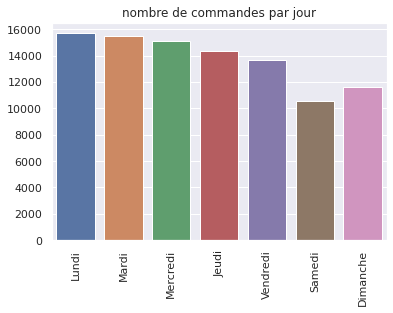

In [ ]:
jour= ['Lundi', 'Mardi', 'Mercredi','Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
sns.barplot(x=orders['day'].value_counts().index, y=orders['day'].value_counts().values)
plt.xticks(np.arange(7),jour,rotation=90)
plt.title('nombre de commandes par jour')
plt.show()

Dans le week-end il y'a moins d'achats effectués que durant la semaine

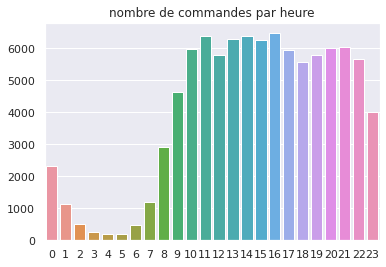

In [ ]:
orders['hour']= orders['order_purchase_timestamp'].dt.hour
sns.barplot(x=orders['hour'].value_counts().index, y=orders['hour'].value_counts().values)
plt.title('nombre de commandes par heure')
plt.show()

Moins de commande la nuit que dans la journée

In [ ]:
orders['date_order']=orders['order_purchase_timestamp'].dt.strftime('%Y-%m')
pd.to_datetime(orders['date_order'],utc=False)
#orders['date_order'] = orders['date_order'].astype('datetime64')
date_order=orders['date_order'].value_counts().sort_index()

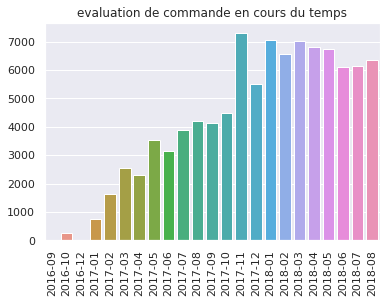

In [ ]:
sns.barplot(x=date_order.index, y=date_order.values)
plt.title('evaluation de commande en cours du temps')
plt.xticks(rotation=90)
plt.show()

In [ ]:
orders['date_completed_order']=orders['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')
pd.to_datetime(orders['date_completed_order'],utc=False)
#orders['date_completed_order'] = orders['date_completed_order'].astype('datetime64')
date_completed_order=orders['date_completed_order'].value_counts().sort_index()

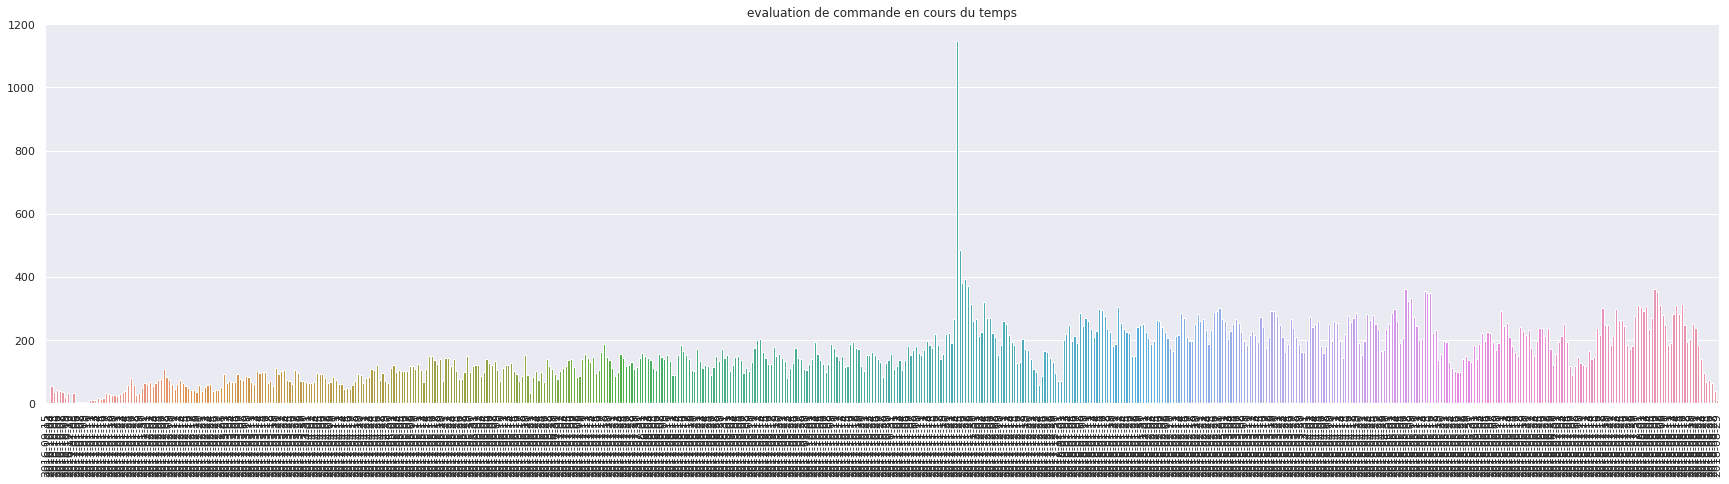

In [ ]:
plt.figure(figsize=(30,7))
sns.barplot(x=date_completed_order.index, y=date_completed_order.values)
plt.title('evaluation de commande en cours du temps')
plt.xticks(rotation=90)
ax = plt.gca()
plt.show()

In [ ]:
orders['livraison_tard']=(orders['delai_actuel']> orders['delai_estime'])*1

In [ ]:
#nombre de jours écoulés depuis dernier achat
orders['delai_dernier_achat'] = orders['order_purchase_timestamp'].max() - orders['order_purchase_timestamp']
orders['delai_dernier_achat'] = orders['delai_dernier_achat'].apply(lambda x: x.days)

In [ ]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delai_actuel,delai_estime,order_purchase_year,order_purchase_month,order_purchase_day,day,hour,date_order,date_completed_order,livraison_tard,delai_dernier_achat
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.429144,15.536632,2017,10,02,0,10,2017-10,2017-10-02,0,331
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.502292,17.858021,2018,07,24,1,20,2018-07,2018-07-24,0,35


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


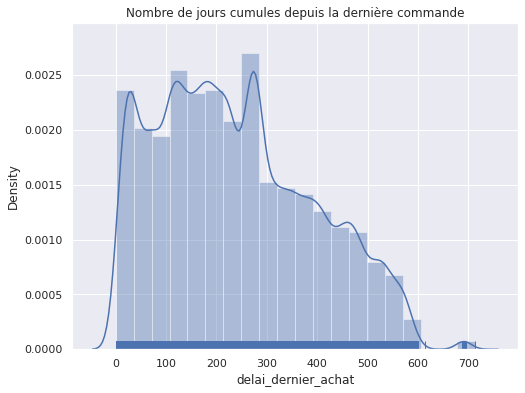

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Nombre de jours cumules depuis la dernière commande')
#sns.barplot(x=orders['delai_dernier_achat'].value_counts().index, y=orders['delai_dernier_achat'].value_counts().values)
sns.distplot(orders['delai_dernier_achat'],bins=20,rug=True)
plt.show()

In [ ]:
orders['xmas_customer']=orders["order_purchase_month"].isin(['11','12'])*1

In [ ]:
orders.loc[orders['xmas_customer'] == 1]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delai_actuel,delai_estime,order_purchase_year,order_purchase_month,order_purchase_day,day,hour,date_order,date_completed_order,livraison_tard,delai_dernier_achat,xmas_customer
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.196331,26.176400,2017,11,18,5,19,2017-11,2017-11-18,0,283,1
17,116f0b09343b49556bbad5f35bee0cdf,3187789bec990987628d7a9beb4dd6ac,delivered,2017-12-26 23:41:31,2017-12-26 23:50:22,2017-12-28 18:33:05,2018-01-08 22:36:36,2018-01-29,12.948773,33.006690,2017,12,26,1,23,2017-12,2017-12-26,0,245,1
18,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,delivered,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11,6.759468,19.990023,2017,11,21,1,0,2017-11,2017-11-21,0,281,1
32,989225ba6d0ebd5873335f7e01de2ae7,816f8653d5361cbf94e58c33f2502a5c,delivered,2017-12-12 13:56:04,2017-12-14 13:54:13,2017-12-16 00:18:57,2018-01-03 18:03:36,2018-01-08,20.173183,24.420683,2017,12,12,1,13,2017-12,2017-12-12,0,260,1
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,33.776551,25.985312,2017,11,24,4,21,2017-11,2017-11-24,1,277,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99412,4146f35ac7a7ef4e39fe344e563c1e3b,e0eac226ceae49858de89e8a5c1ba1ec,delivered,2017-11-26 19:42:22,2017-11-26 19:53:48,2017-11-27 18:33:24,2017-12-05 18:38:40,2017-12-15,8.947824,18.170972,2017,11,26,6,19,2017-11,2017-11-26,0,275,1
99418,788541a19c0791de0504c5a9cb7e7bd5,a537aaf902d2f436eb7f44817154bb68,delivered,2017-11-30 17:54:28,2017-11-30 18:16:25,2017-12-05 20:58:57,2017-12-13 20:34:50,2017-12-27,13.096123,26.238600,2017,11,30,3,17,2017-11,2017-11-30,0,271,1
99424,6ec4642f9993cc34f826cfb9068e5a2f,f00bb12620b7b232233cace1b229db18,delivered,2017-11-21 20:18:03,2017-11-21 20:28:52,2017-11-27 17:18:52,2017-12-02 16:48:46,2017-12-08,10.847153,16.146620,2017,11,21,1,20,2017-11,2017-11-21,0,280,1
99429,0e4b26f1fb99fc0f0472dd5f403d36d4,2e96fa6d55b9732013caed9866e2552d,delivered,2017-11-05 16:17:53,2017-11-05 16:30:29,2017-11-07 18:35:08,2017-11-08 16:08:56,2017-11-17,2.985035,11.312164,2017,11,05,6,16,2017-11,2017-11-05,0,296,1


Nombre de clients par commandes:

In [ ]:
df_orders = pd.merge(orders, customers, how="left", on=["customer_id"])
df_orders= df_orders.groupby(by='customer_unique_id').nunique()

Text(0.5, 1.0, 'le nombre de commande associé aux clients')

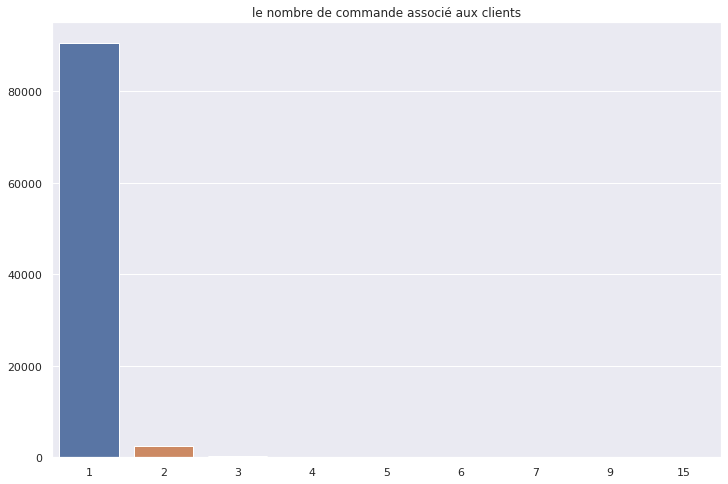

In [ ]:
plt.figure(figsize=[12,8])
sns.barplot(x=df_orders.order_id.value_counts().index,y=df_orders.order_id.value_counts().values)
plt.title('le nombre de commande associé aux clients')

In [ ]:
orders["moins_6mois"] = np.where((orders['delai_dernier_achat'] <180),1,0)
orders["6_12mois"] = np.where((orders['delai_dernier_achat'] >= 180)& (orders['delai_dernier_achat'] <360),1,0)
orders["12_18mois"] = np.where((orders['delai_dernier_achat'] >= 360)&(orders['delai_dernier_achat'] <540),1,0)
orders["18_24mois"] = np.where((orders['delai_dernier_achat'] >= 540)&(orders['delai_dernier_achat'] <720),1,0)
orders["plus_2ans"] = np.where((orders['delai_dernier_achat'] >= 720),1,0)

In [ ]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delai_actuel,delai_estime,order_purchase_year,order_purchase_month,order_purchase_day,day,hour,date_order,date_completed_order,livraison_tard,delai_dernier_achat,xmas_customer,moins_6mois,6_12mois,12_18mois,18_24mois,plus_2ans
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.429144,15.536632,2017,10,02,0,10,2017-10,2017-10-02,0,331,0,0,1,0,0,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.502292,17.858021,2018,07,24,1,20,2018-07,2018-07-24,0,35,0,1,0,0,0,0


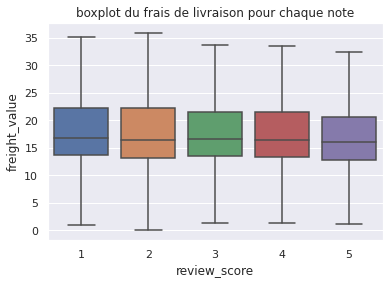

In [ ]:
merge_items_reviews= pd.merge(order_items, order_reviews, how='left',on=["order_id"])
sns.boxplot(x="review_score", y="freight_value", data=merge_items_reviews,showfliers=False)
plt.title('boxplot du frais de livraison pour chaque note')
plt.show()

il y a aucune relation entre les frais de livraison et l'evaluation du produit

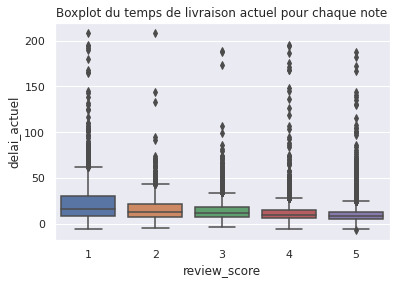

In [ ]:
# Boxplot du temps de livraison actuel pour chaque score
merge_orders_reviews= pd.merge(orders, order_reviews, how='left',on=["order_id"])
sns.boxplot(x="review_score", y="delai_actuel",data=merge_orders_reviews)
plt.title('Boxplot du temps de livraison actuel pour chaque note')
plt.show()

plus le produit est livrée rapidement et plus l'évaluation du produit est bonne

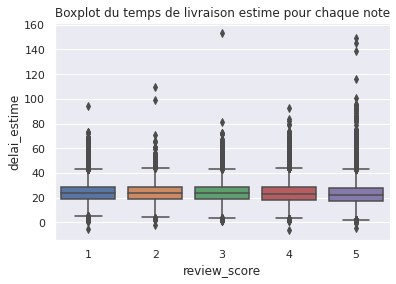

In [ ]:
# Boxplot du temps de livraison estime pour chaque score
sns.boxplot(x="review_score", y="delai_estime",data=merge_orders_reviews)
plt.title('Boxplot du temps de livraison estime pour chaque note')
plt.show()

aucune relation

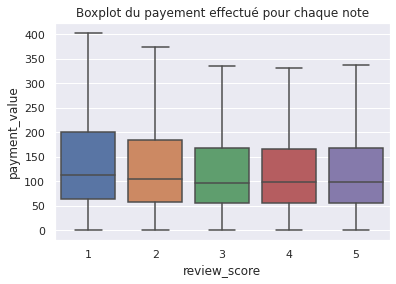

In [ ]:
# Boxplot du payement effectué pour chaque note
merge_payment_reviews= pd.merge(order_payments, order_reviews, how='left',on=["order_id"])
sns.boxplot(x="review_score", y="payment_value", data=merge_payment_reviews, showfliers=False)
plt.title('Boxplot du payement effectué pour chaque note')
plt.show()

Plus le prix de la transaction est faible et plus son évaluation est bonne

- But : Assemblage de l'ensemble des  dataframes dans un seul dataframe sur customer_unique_id

In [ ]:
#customer_id
order_reviews_new=order_reviews.groupby(['order_id']).agg(
    {'review_id':"count",    # get the count of review
    'review_score': "mean"  # mean score per review
     })
order_reviews_new.rename(columns={'review_id':'nb_of_reviews','review_score':'review_mean_score'},inplace=True)

In [ ]:
order_payments_new=order_payments.groupby(['order_id']).agg(
    {	'payment_value':'sum', #sum of payment per order
     'multi_payment':'max',
     'x0_boleto':'sum', #sum of type
     'x0_Carte_bancaire'	:'sum',
     'x0_voucher' :'sum'
     })
order_payments_new.rename(columns={'payment_value':'sum_total_pay'},inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution pour payment value per order')

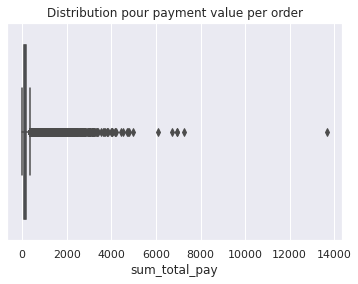

In [ ]:
sns.boxplot(order_payments_new['sum_total_pay'])
plt.title('Distribution pour payment value per order')

In [ ]:
 order_items_new= pd.merge(order_items,products, how="left",on=["product_id"])
#products merger with order_items on 'product_id' : order_items
#group the items table by order_id.
order_items_new=order_items_new.groupby(['order_id']).agg(
{"order_item_id":'count',  # get the count of item
 'x0_Unknown': 'sum',#sum category per group
'x0_appliances': 'sum',
'x0_arts': 'sum',
'x0_auto': 'sum',
'x0_baby': 'sum',
'x0_books': 'sum',
'x0_construction': 'sum',
'x0_cosmetic': 'sum',
'x0_electronics': 'sum',
'x0_fashion': 'sum',
'x0_food_drinks': 'sum',
'x0_garden_pets': 'sum',
'x0_home': 'sum',
'x0_leisure':'sum',
'x0_market_palce':'sum',
'x0_music':'sum',
'x0_office':'sum'
})
order_items_new.rename(columns={'order_item_id':'nb_of_items'},inplace=True)

In [ ]:
orders= orders.drop(['order_status','order_approved_at','order_delivered_carrier_date',	'order_delivered_customer_date','order_estimated_delivery_date','order_purchase_year'],axis=1)

In [ ]:
orders = pd.get_dummies(orders,columns=['order_purchase_month'])

In [ ]:
orders.head(1)

,order_id,customer_id,order_purchase_timestamp,delai_actuel,delai_estime,order_purchase_day,day,hour,date_order,date_completed_order,livraison_tard,delai_dernier_achat,xmas_customer,moins_6mois,6_12mois,12_18mois,18_24mois,plus_2ans,order_purchase_month_01,order_purchase_month_02,order_purchase_month_03,order_purchase_month_04,order_purchase_month_05,order_purchase_month_06,order_purchase_month_07,order_purchase_month_08,order_purchase_month_09,order_purchase_month_10,order_purchase_month_11,order_purchase_month_12
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,8.429144,15.536632,02,0,10,2017-10,2017-10-02,0,331,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Fusion des dataframes orders et orders_reviews  par la colonne commune 'order_id'
orders_1=pd.merge(orders, order_reviews_new, how="left",on=['order_id'])

In [ ]:
#Fusion des dataframes orders et order_payments par la colonne commune 'order_id'
orders_2= pd.merge(orders_1,order_payments_new,how="left",on=['order_id'])

In [ ]:
#Fusion des dataframes orders et order_items par la colonne commune 'order_id'
orders_3= pd.merge(orders_2,order_items_new,how="left",on=['order_id'])

In [ ]:
df= pd.merge(orders_3, customers, how="left",on=['customer_id'])

In [ ]:
df.head(3)

,order_id,customer_id,order_purchase_timestamp,delai_actuel,delai_estime,order_purchase_day,day,hour,date_order,date_completed_order,livraison_tard,delai_dernier_achat,xmas_customer,moins_6mois,6_12mois,12_18mois,18_24mois,plus_2ans,order_purchase_month_01,order_purchase_month_02,order_purchase_month_03,order_purchase_month_04,order_purchase_month_05,order_purchase_month_06,order_purchase_month_07,order_purchase_month_08,order_purchase_month_09,order_purchase_month_10,order_purchase_month_11,order_purchase_month_12,nb_of_reviews,review_mean_score,sum_total_pay,multi_payment,x0_boleto,x0_Carte_bancaire,x0_voucher,nb_of_items,x0_Unknown,x0_appliances,x0_arts,x0_auto,x0_baby,x0_books,x0_construction,x0_cosmetic,x0_electronics,x0_fashion,x0_food_drinks,x0_garden_pets,x0_home,x0_leisure,x0_market_palce,x0_music,x0_office,customer_unique_id,zip_code_prefix,customer_city,customer_region_centre_ouest,customer_region_nord,customer_region_nord_est,customer_region_sud,customer_region_sud_est
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,8.429144,15.536632,02,0,10,2017-10,2017-10-02,0,331,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,4.0,38.71,0.0,0.0,1.0,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,0,0,0,0,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,12.502292,17.858021,24,1,20,2018-07,2018-07-24,0,35,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,4.0,141.46,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,af07308b275d755c9edb36a90c618231,47813,barreiras,0,0,1,0,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,9.382708,26.628206,08,2,8,2018-08,2018-08-08,0,21,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,5.0,179.12,1.0,0.0,1.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,1,0,0,0,0


In [ ]:
df= df.sort_values(by='date_order',ascending=True)

In [ ]:
df.isna().sum().sum()

5

In [ ]:
df.head(1)

,order_id,customer_id,order_purchase_timestamp,delai_actuel,delai_estime,order_purchase_day,day,hour,date_order,date_completed_order,livraison_tard,delai_dernier_achat,xmas_customer,moins_6mois,6_12mois,12_18mois,18_24mois,plus_2ans,order_purchase_month_01,order_purchase_month_02,order_purchase_month_03,order_purchase_month_04,order_purchase_month_05,order_purchase_month_06,order_purchase_month_07,order_purchase_month_08,order_purchase_month_09,order_purchase_month_10,order_purchase_month_11,order_purchase_month_12,nb_of_reviews,review_mean_score,sum_total_pay,multi_payment,x0_boleto,x0_Carte_bancaire,x0_voucher,nb_of_items,x0_Unknown,x0_appliances,x0_arts,x0_auto,x0_baby,x0_books,x0_construction,x0_cosmetic,x0_electronics,x0_fashion,x0_food_drinks,x0_garden_pets,x0_home,x0_leisure,x0_market_palce,x0_music,x0_office,customer_unique_id,zip_code_prefix,customer_city,customer_region_centre_ouest,customer_region_nord,customer_region_nord_est,customer_region_sud,customer_region_sud_est
29803,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38,54.813194,18.488449,15,3,12,2016-09,2016-09-15,1,713,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1.0,NaN,NaN,NaN,NaN,NaN,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,0,0,0,0,1


In [ ]:
df=df.drop([29803])

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df_finale= df.groupby(['customer_unique_id']).agg(
{'order_id':'count',
'order_purchase_timestamp':'max',
 'delai_actuel':'mean',
 'delai_estime':'mean',
 'livraison_tard':'sum',
'delai_dernier_achat':'max',
 #'order_purchase_month_01':'sum',
 #'order_purchase_month_02':'sum',
 #'order_purchase_month_03':'sum',
 #'order_purchase_month_04':'sum',
 #'order_purchase_month_05':'sum',
 #'order_purchase_month_06':'sum',
 #'order_purchase_month_07':'sum',
 #'order_purchase_month_08':'sum',
 #'order_purchase_month_09':'sum',
 #'order_purchase_month_10':'sum',
 #'order_purchase_month_11':'sum',
 #'order_purchase_month_12':'sum',
 'xmas_customer':'max',
 #'black_friday_customer':'max',
 'nb_of_reviews':'count',
 'review_mean_score':'mean'	,
 'sum_total_pay':'sum',
 'x0_boleto':'sum',
 'x0_Carte_bancaire':'sum',
 'x0_voucher':'sum',
 'nb_of_items':'count',
 'x0_Unknown':'sum',
 'x0_appliances':'sum',
 'x0_arts':'sum',
 'x0_auto':'sum',
 'x0_baby':'sum',
 'x0_books':'sum',
 'x0_construction':'sum',
 'x0_cosmetic'	:'sum',
 'x0_electronics':'sum',
 'x0_fashion'	:'sum',
 'x0_food_drinks':'sum',
 'x0_garden_pets':'sum',
 'x0_home':'sum',
 'x0_leisure':'sum',
 'x0_market_palce':'sum',
 'x0_music':'sum',
 'x0_office':'sum',
 "moins_6mois":'max',
 "6_12mois":'max',
 "12_18mois":'max',
 "18_24mois":'max',
 "plus_2ans":'max'
 #"customer_region_centre_ouest":'max',
 	#"customer_region_nord":'max',
 #"customer_region_nord_est":'max',
 	#"customer_region_sud"	:'max',
 #"customer_region_sud_est":'max'
    })
df_finale.rename(columns={'order_id':'nb_of_orders'},inplace=True) #number of order per coustomer unique

In [ ]:
df_finale.sort_values(by='order_purchase_timestamp',ascending=False,inplace=True)

In [ ]:
df_finale

,nb_of_orders,order_purchase_timestamp,delai_actuel,delai_estime,livraison_tard,delai_dernier_achat,xmas_customer,nb_of_reviews,review_mean_score,sum_total_pay,x0_boleto,x0_Carte_bancaire,x0_voucher,nb_of_items,x0_Unknown,x0_appliances,x0_arts,x0_auto,x0_baby,x0_books,x0_construction,x0_cosmetic,x0_electronics,x0_fashion,x0_food_drinks,x0_garden_pets,x0_home,x0_leisure,x0_market_palce,x0_music,x0_office,moins_6mois,6_12mois,12_18mois,18_24mois,plus_2ans
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24ac2b4327e25baf39f2119e4228976a,1,2018-08-29 15:00:37,1.050810,6.367755,0,0,0,1,5.0,93.75,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
b701bebbdf478f5500348f03aff62121,1,2018-08-29 14:52:00,1.063623,4.371273,0,0,0,1,3.0,33.23,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0
7febafa06d9d8f232a900a2937f04338,1,2018-08-29 14:18:28,1.098704,12.395567,0,0,0,1,5.0,61.29,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
5c58de6fb80e93396e2f35642666b693,1,2018-08-29 14:18:23,1.079028,5.395058,0,0,0,1,5.0,510.96,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,0,0,0,0
7a22d14aa3c3599238509ddca4b93b01,1,2018-08-29 12:25:59,1.425810,4.475498,0,0,0,1,1.0,73.10,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390ed59fa1febbfda31a80b4318c8cb,1,2016-10-03 22:44:10,30.150289,57.563600,0,694,0,1,5.0,154.57,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
87776adb449c551e74c13fc34f036105,1,2016-10-03 22:31:31,10.242095,49.569873,0,694,0,1,5.0,40.95,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
8d3a54507421dbd2ce0a1d58046826e0,1,2016-10-03 22:06:03,27.027488,49.563808,0,694,0,1,1.0,133.46,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0


Chaque ligne représente donc un client du site.

In [ ]:
df_finale.isna().sum().sum()

0

In [ ]:
df_finale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93335 entries, 24ac2b4327e25baf39f2119e4228976a to 2f64e403852e6893ae37485d5fcacdaf
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   nb_of_orders              93335 non-null  int64         
 1   order_purchase_timestamp  93335 non-null  datetime64[ns]
 2   delai_actuel              93335 non-null  float64       
 3   delai_estime              93335 non-null  float64       
 4   livraison_tard            93335 non-null  int64         
 5   delai_dernier_achat       93335 non-null  int64         
 6   xmas_customer             93335 non-null  int64         
 7   nb_of_reviews             93335 non-null  int64         
 8   review_mean_score         93335 non-null  float64       
 9   sum_total_pay             93335 non-null  float64       
 10  x0_boleto                 93335 non-null  float64       
 11  x0_Carte_bancaire         9

In [ ]:
df_finale.to_csv('D:\Downloads\dataframe.csv', index=False)

In [ ]:
df_finale.to_csv('clean_data.csv')
from google.colab import drive
drive.mount('drive')
!cp clean_data.csv "drive/My Drive/CSV"

**Analyse multivariée**

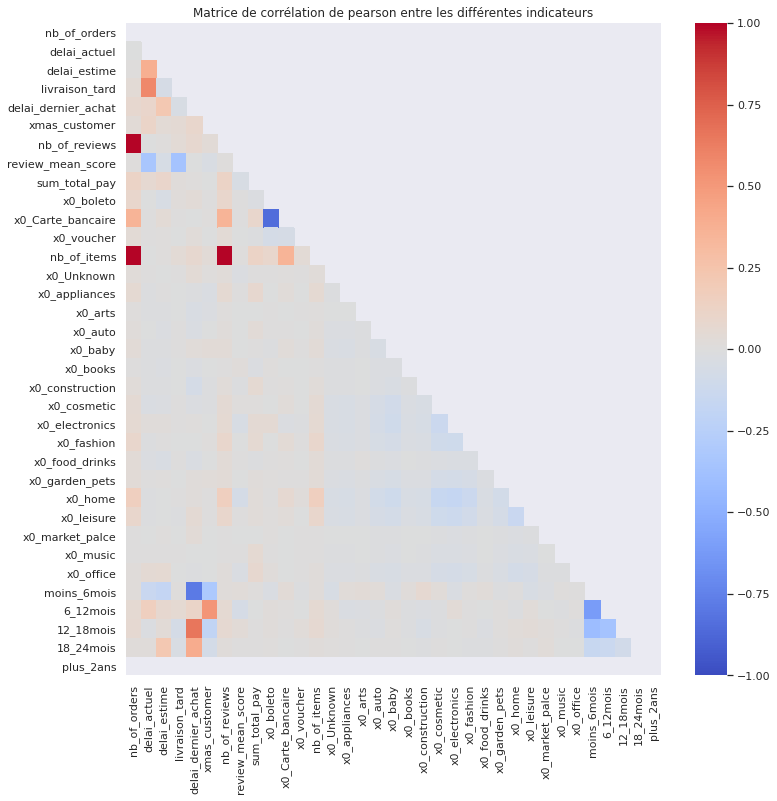

In [ ]:
#matrice de correlation
plt.figure(figsize=(12,12))
sns.set(font_scale=1)
corr = df_finale.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.title('Matrice de corrélation de pearson entre les différentes indicateurs')
sns.heatmap(corr,mask=mask,vmin=-1,vmax=1,cmap='coolwarm',center=0,annot=False)

In [ ]:
df_finale=df_finale.drop(columns=['nb_of_reviews','nb_of_items'])

In [ ]:
df_finale.shape

(93335, 34)

Echantillon


In [ ]:
from sklearn.preprocessing import StandardScaler
# frist sample : DATA from 29/08/2018 to 29/05/2018
X1=df_finale.iloc[0:18667,:]
X1=X1.drop(['order_purchase_timestamp'],axis=1)
sc = StandardScaler()
numerical_columns = X1.select_dtypes(['int64','float64','uint8']).columns
X1[numerical_columns] = sc.fit_transform(X1[numerical_columns])

In [ ]:
X1

,nb_of_orders,delai_actuel,delai_estime,livraison_tard,delai_dernier_achat,xmas_customer,review_mean_score,sum_total_pay,x0_boleto,x0_Carte_bancaire,x0_voucher,x0_Unknown,x0_appliances,x0_arts,x0_auto,x0_baby,x0_books,x0_construction,x0_cosmetic,x0_electronics,x0_fashion,x0_food_drinks,x0_garden_pets,x0_home,x0_leisure,x0_market_palce,x0_music,x0_office,moins_6mois,6_12mois,12_18mois,18_24mois,plus_2ans
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24ac2b4327e25baf39f2119e4228976a,-0.156097,-1.237305,-1.355001,-0.244508,-1.080155,-0.054854,0.596647,-0.313603,-0.468933,0.343486,-0.147075,-0.070622,-0.136176,-0.073389,-0.217485,-0.240695,-0.097527,-0.184548,-0.384891,1.863281,-0.305392,-0.118472,-0.199678,-0.469518,-0.27921,-0.03275,-0.084692,-0.186945,0.0,-0.101405,-0.072647,-0.023151,0.0
b701bebbdf478f5500348f03aff62121,-0.156097,-1.235119,-1.544831,-0.244508,-1.080155,-0.054854,-1.108496,-0.566949,-0.468933,0.343486,-0.147075,-0.070622,-0.136176,-0.073389,-0.217485,-0.240695,-0.097527,-0.184548,-0.384891,-0.330051,-0.305392,-0.118472,-0.199678,-0.469518,2.61635,-0.03275,-0.084692,-0.186945,0.0,-0.101405,-0.072647,-0.023151,0.0
7febafa06d9d8f232a900a2937f04338,-0.156097,-1.229135,-0.781862,-0.244508,-1.080155,-0.054854,0.596647,-0.449486,-0.468933,-1.776838,2.876545,-0.070622,-0.136176,-0.073389,-0.217485,-0.240695,-0.097527,-0.184548,1.877312,-0.330051,-0.305392,-0.118472,-0.199678,-0.469518,-0.27921,-0.03275,-0.084692,-0.186945,0.0,-0.101405,-0.072647,-0.023151,0.0
5c58de6fb80e93396e2f35642666b693,-0.156097,-1.232491,-1.447487,-0.244508,-1.080155,-0.054854,0.596647,1.432903,-0.468933,0.343486,-0.147075,-0.070622,-0.136176,-0.073389,-0.217485,-0.240695,-0.097527,-0.184548,-0.384891,-0.330051,-0.305392,-0.118472,-0.199678,2.629119,-0.27921,-0.03275,-0.084692,-0.186945,0.0,-0.101405,-0.072647,-0.023151,0.0
7a22d14aa3c3599238509ddca4b93b01,-0.156097,-1.173340,-1.534921,-0.244508,-1.080155,-0.054854,-2.813639,-0.400047,-0.468933,0.343486,-0.147075,-0.070622,-0.136176,-0.073389,-0.217485,3.412188,-0.097527,-0.184548,-0.384891,-0.330051,-0.305392,-0.118472,-0.199678,-0.469518,-0.27921,-0.03275,-0.084692,-0.186945,0.0,-0.101405,-0.072647,-0.023151,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846618f4e6c6867cfcfc9d7591282aa3,-0.156097,0.114431,0.899014,-0.244508,0.907929,-0.054854,-0.255925,0.328972,-0.468933,0.343486,-0.147075,-0.070622,-0.136176,-0.073389,-0.217485,-0.240695,-0.097527,-0.184548,-0.384891,-0.330051,-0.305392,-0.118472,-0.199678,1.079801,-0.27921,-0.03275,-0.084692,-0.186945,0.0,-0.101405,-0.072647,-0.023151,0.0
a0166e4e2e823b3f62b4a58a7363c6db,-0.156097,-0.118160,2.610499,-0.244508,0.907929,-0.054854,-0.255925,-0.144566,-0.468933,0.343486,-0.147075,-0.070622,-0.136176,-0.073389,-0.217485,-0.240695,-0.097527,-0.184548,-0.384891,-0.330051,2.533625,-0.118472,-0.199678,-0.469518,-0.27921,-0.03275,-0.084692,-0.186945,0.0,-0.101405,-0.072647,-0.023151,0.0
2adedf87bb253342f754153b4d145eca,-0.156097,-0.812861,0.139584,-0.244508,0.907929,-0.054854,0.596647,-0.503948,-0.468933,-1.776838,2.876545,-0.070622,-0.136176,-0.073389,-0.217485,-0.240695,8.915048,-0.184548,-0.384891,-0.330051,-0.305392,-0.118472,-0.199678,-0.469518,-0.27921,-0.03275,-0.084692,-0.186945,0.0,-0.101405,-0.072647,-0.023151,0.0


- Algorithms used :
 - Kmeans
 - Agglomerative Clustering
 - DBSCAN

- Observe the silhouette coef of each model for a range of cluster number ( between 2 and 10 clusters)

- Obersve the clusters of k-means in 2 dimension (PCA and TSNE)

- Evaluate the stability of the clustering algorithm with multiple iteration


- Find the optimum value  of the nombre of clusters

Methode d'elbow

In [ ]:
from sklearn.cluster import KMeans
inertia = []
k_range= range(2,11)
for k in k_range:
  cls_model = KMeans(n_clusters = k,init='k-means++').fit(X1)
  inertia.append(cls_model.inertia_)

In [ ]:
cls_model.labels_

array([2, 1, 2, ..., 2, 0, 2], dtype=int32)

Text(0.5, 1.0, 'Comparaison de la somme des inerties en fonction du nombre de clusters')

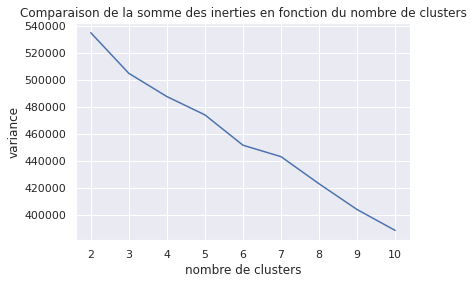

In [ ]:
plt.plot(k_range,inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('variance')
#différents nombres de clusters K en fonction de la variance
plt.title('Comparaison de la somme des inerties en fonction du nombre de clusters')

le nombre optimal de clusters est n=6 clusters


Methode de silhouette

In [ ]:
from sklearn.metrics import silhouette_score
silhouettes= []
result_clusters=[]
result_iteration=[]
df_coef_silhouettes=pd.DataFrame()
k_range= range(2,11)
#1ere loop pour observe la stabilite
for i in range(4):

  for k in k_range:
    cls_model = KMeans(n_clusters = k,init='k-means++').fit(X1)
    #On enregistre les scores de coefficient de silhouette à chaque passage
    silhouettes.append(silhouette_score(X1,cls_model.labels_))

  df_coef_silhouettes['silhouettes{}'.format(i)]=silhouettes
  silhouettes=[]

In [ ]:
df_coef_silhouettes

,silhouettes0,silhouettes1,silhouettes2,silhouettes3
0,0.680341,0.149044,0.680341,0.680341
1,0.155785,0.155785,0.212665,0.155785
2,0.160166,0.160166,0.157303,0.156918
3,0.031457,0.116601,0.161873,0.098135
4,0.151990,0.111986,0.067077,0.103998
5,0.181139,0.181692,0.077388,0.091348
6,0.095823,0.127615,0.113208,0.091276
7,0.065890,0.136171,0.123185,0.129074
8,0.104672,0.077333,0.185600,0.115541


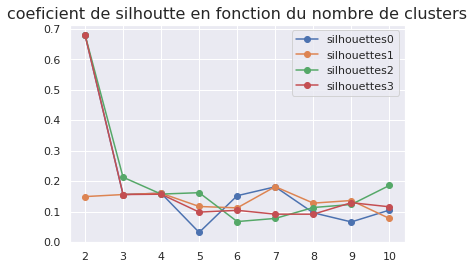

In [ ]:
for col in df_coef_silhouettes.columns:
    plt.plot(k_range,df_coef_silhouettes[col],marker='o',label=col)
plt.title("coeficient de silhoutte en fonction du nombre de clusters",fontsize=16)
plt.legend()


le coefficient de silhouette est maximal pour 2 clusters (score = 0.75)

Davies-Bouldin Score

In [ ]:
from sklearn.metrics.cluster import davies_bouldin_score
DBScore= []
df_DBScore= pd.DataFrame()
k_range= range(2,11)
for i in range(4):
  for k in k_range:

    cls_model1= KMeans(n_clusters=k,init='k-means++').fit(X1)
    DBScore.append(davies_bouldin_score(X1,cls_model1.labels_))

  df_DBScore['DBScore{}'.format(i)]= DBScore
  DBScore=[]

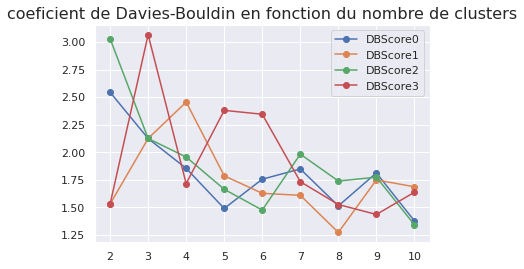

In [ ]:
for cols in df_DBScore.columns:

  plt.plot(k_range,df_DBScore[cols],marker='o',label=cols)
plt.title("coeficient de Davies-Bouldin en fonction du nombre de clusters",fontsize=16)
plt.legend()

le score de Davies Bouldin est minimal pour 9 clusters et stable entre 8 et 10 cluster

 **Représentation**

Pour regarder à quoi ressemble les clusters , projeter les données en 2D

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X1)
print(pca.explained_variance_ratio_.cumsum())
X_trans= pca.transform(X1)

[0.09702191 0.1523583 ]


la variance expliquée par les 2 premier composantes

In [ ]:
#n=8 cluster
np.unique(kmeans_model3.labels_,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([3366,  199, 4785,   56,   57,   52, 5073, 5079]))

In [ ]:
#n=5 cluster
np.unique(kmeans_model1.labels_,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([  95, 5938, 6142,  202, 6290]))

In [ ]:
#n=7 cluster
np.unique(kmeans_model2.labels_,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([6050, 5728, 5888,   56,  792,   56,   97]))

Text(0.5, 1.0, 'Number of sample by cluster')

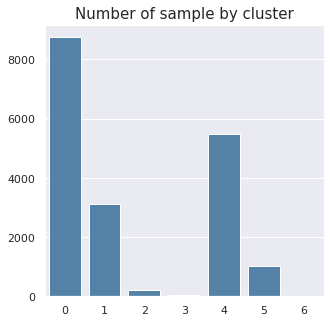

In [ ]:
label =pd.Series(kmeans_model2.labels_)
plt.figure(figsize=[5,5])
sns.barplot(x=label.value_counts().sort_index(ascending=True).index,y=label.value_counts().sort_index(ascending=True).values,color='steelblue')
plt.title('Number of sample by cluster',fontsize=15)

Text(0.5, 1.0, 'Number of sample by cluster')

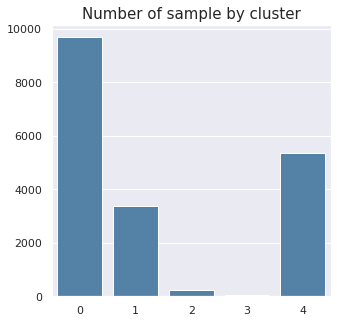

In [ ]:
label =pd.Series(kmeans_model1.labels_)
plt.figure(figsize=[5,5])
sns.barplot(x=label.value_counts().sort_index(ascending=True).index,y=label.value_counts().sort_index(ascending=True).values,color='steelblue')
plt.title('Number of sample by cluster',fontsize=15)

Text(0.5, 1.0, 'Number of sample by cluster')

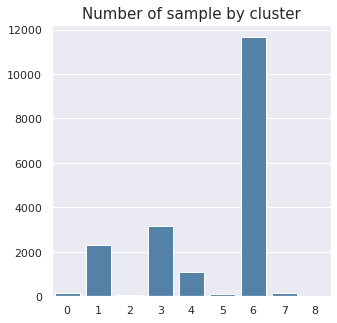

In [ ]:
label =pd.Series(kmeans_model3.labels_)
plt.figure(figsize=[5,5])
sns.barplot(x=label.value_counts().sort_index(ascending=True).index,y=label.value_counts().sort_index(ascending=True).values,color='steelblue')
plt.title('Number of sample by cluster',fontsize=15)

No handles with labels found to put in legend.


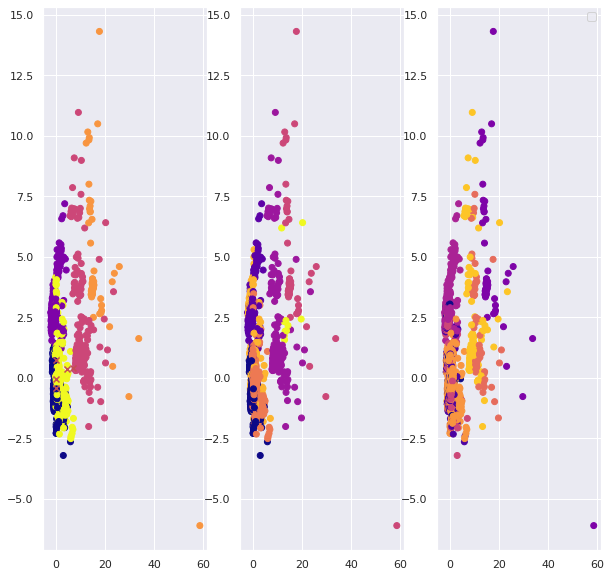

In [ ]:
kmeans_model1 = KMeans(n_clusters = 5,init='k-means++' ,random_state=0).fit(X1)
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(131)
ax.scatter(X_trans[:,0],X_trans[:,1],c=kmeans_model1.labels_,cmap = "plasma")
ax.scatter(kmeans_model1.cluster_centers_[:,0],kmeans_model1.cluster_centers_[:,1],c='r',marker='x')
kmeans_model2 = KMeans(n_clusters = 7,init='k-means++',random_state=0).fit(X1)
ax=fig.add_subplot(132)
ax.scatter(X_trans[:,0],X_trans[:,1],c=kmeans_model2.labels_,cmap = "plasma")
kmeans_model3 = KMeans(n_clusters = 9,init='k-means++',random_state=0).fit(X1)
ax=fig.add_subplot(133)
ax.scatter(X_trans[:,0],X_trans[:,1],c=kmeans_model3.labels_,cmap = "plasma")
plt.legend()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


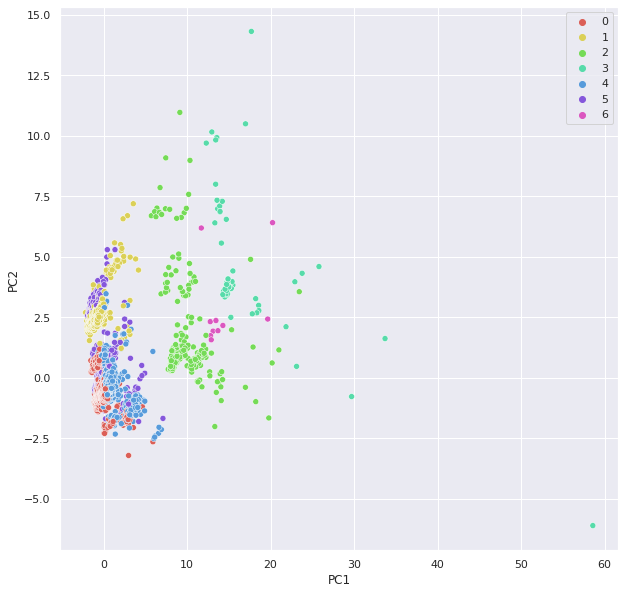

In [ ]:
#in 2D
plt.figure(figsize =(10,10))
n_clusters=7
sns.scatterplot(X_trans[:,0],X_trans[:,1],hue = kmeans_model2.labels_,palette = sns.color_palette("hls", n_clusters))
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [ ]:
tsne = TSNE(n_components=2)
X_TNSE = tsne.fit_transform(X1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


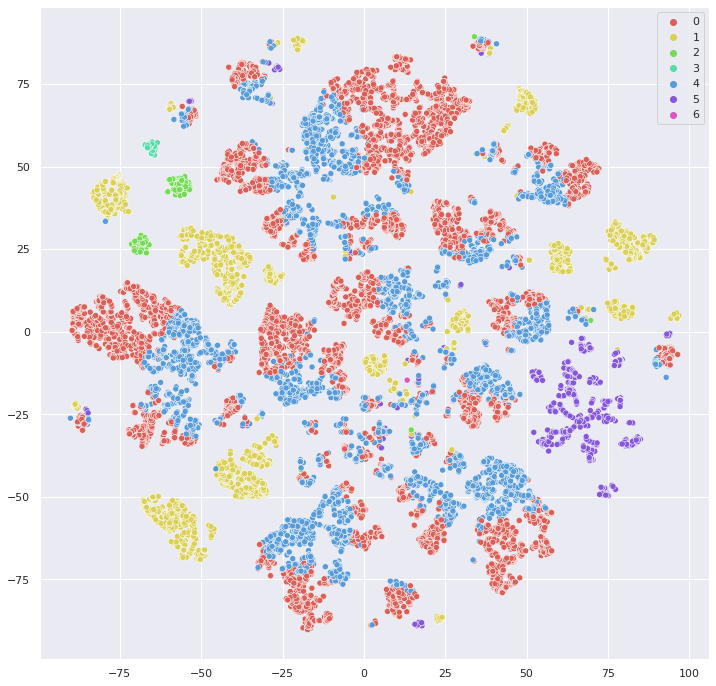

In [ ]:
fig = plt.figure(figsize=[12,12])
sns.scatterplot(X_TNSE[:,0 ],
                X_TNSE[:,1],
                hue=kmeans_model2.labels_,
                legend='full',
                palette=sns.color_palette("hls",7))
plt.legend()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
df=pd.DataFrame()
silhouettes=[]
result_clusters=[]
#davies_bouldin_score=[]

for i in range(2,11):
  cls= AgglomerativeClustering(n_clusters=i,linkage="ward",affinity="euclidean").fit(X1)
  silhouettes.append(silhouette_score(X1,cls.labels_))
  #davies_bouldin_score.append(davies_bouldin_score(X,cls.labels_))
  result_clusters.append(i)

df['nombre_cluster']=result_clusters
df['coef_silh']=silhouettes
#df['davies_bouldin']=davies_bouldin_score


In [ ]:
df

,nombre_cluster,coef_silh
0,2,0.675903
1,3,0.658449
2,4,0.659774
3,5,0.662017
4,6,0.321232
5,7,0.299106
6,8,0.248818
7,9,0.143995
8,10,0.159772


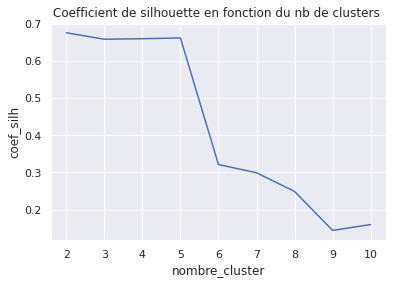

In [ ]:
sns.lineplot(x='nombre_cluster',y='coef_silh',data=df)
plt.title('Coefficient de silhouette en fonction du nb de clusters ')
plt.show()

Text(0.5, 1.0, 'Number of sample by cluster')

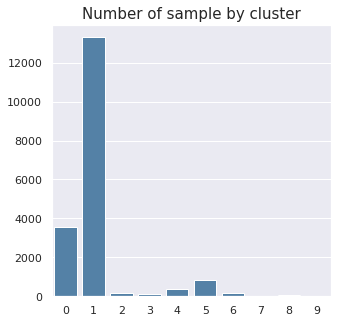

In [ ]:
label =pd.Series(cls.labels_)
plt.figure(figsize=[5,5])
sns.barplot(x=label.value_counts().sort_index(ascending=True).index,y=label.value_counts().sort_index(ascending=True).values,color='steelblue')
plt.title('Number of sample by cluster',fontsize=15)

In [ ]:
from scipy.cluster.hierarchy import dendrogram

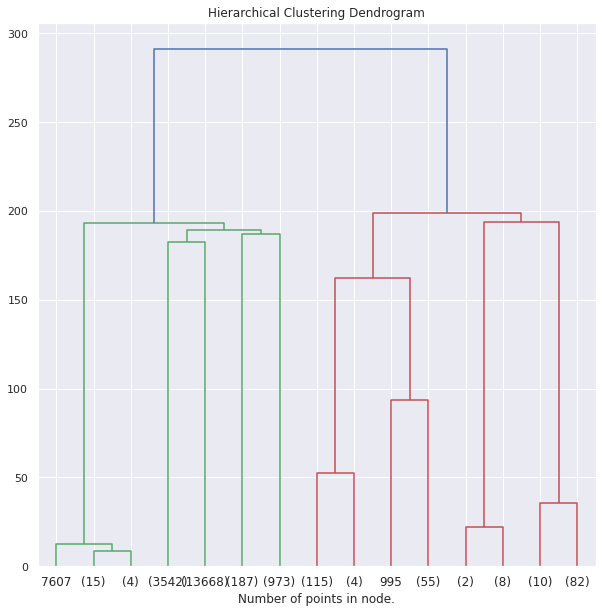

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X1)
plt.figure(figsize=(10,10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node.")
plt.show()

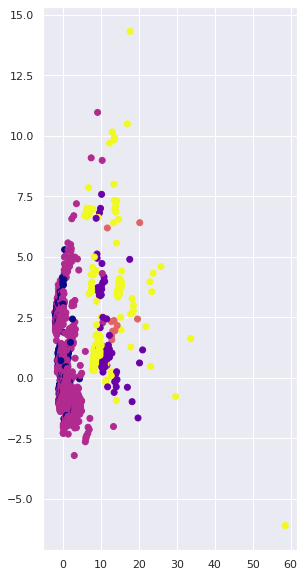

In [ ]:
agg_model = AgglomerativeClustering(n_clusters=6,linkage="ward",affinity="euclidean").fit(X1)
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(121)
ax.scatter(X_trans[:,0],X_trans[:,1],c=agg_model.labels_,cmap = "plasma")

In [ ]:
from sklearn.cluster import DBSCAN
silhouettes = []
#score = []
result_epsilon = []
result_min_samples = []
df_DBScan= pd.DataFrame()
min_sam= range(2,11)
epsilon=[0.5,1,2,4,10,12,14]
for eps in epsilon:

  for min_samples in min_sam:
    db = DBSCAN(eps=eps,min_samples=min_samples)
    db.fit(X1)

    silhouettes.append(silhouette_score(X1,db.labels_))
    #score.append(davies_bouldin_score(X1,db.labels_))
    result_epsilon.append(eps)
    result_min_samples.append(min_samples)

df_DBScan["eps"] = result_epsilon
df_DBScan["min_samples"] = result_min_samples
#df_DBScan['Davies-Bouldin']= score
df_DBScan["coef_silh"] = silhouettes

In [ ]:
np.unique(db.labels_,return_counts=True)

(array([-1,  0,  1,  2,  3]), array([   31, 18478,    90,    48,    20]))

Text(0.5, 1.0, 'Number of sample by cluster')

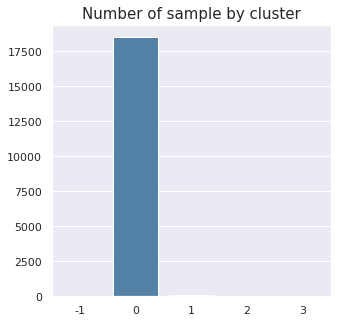

In [ ]:
label =pd.Series(db.labels_)
plt.figure(figsize=[5,5])
sns.barplot(x=label.value_counts().sort_index(ascending=True).index,y=label.value_counts().sort_index(ascending=True).values,color='steelblue')
plt.title('Number of sample by cluster',fontsize=15)

In [ ]:
df_DBScan

,eps,min_samples,coef_silh
0,0.5,2,-0.242334
1,0.5,3,-0.243784
2,0.5,4,-0.254331
3,0.5,5,-0.259567
4,0.5,6,-0.261276
...,...,...,...
58,14.0,6,0.671143
59,14.0,7,0.671176
60,14.0,8,0.671176
61,14.0,9,0.671235


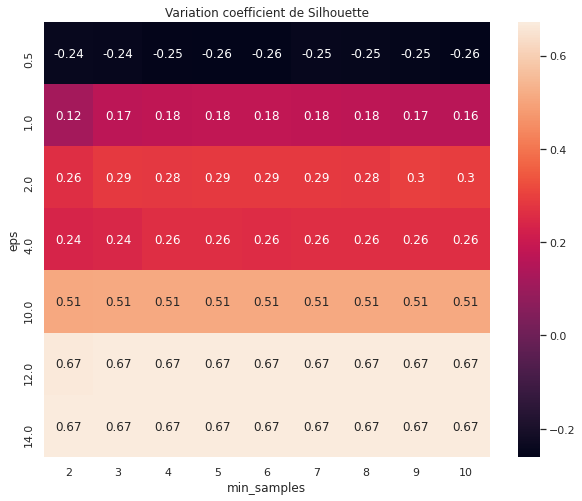

In [ ]:
plt.figure(figsize=(10,8))
pivot = df_DBScan.pivot(index='eps', columns='min_samples', values='coef_silh')
ax = sns.heatmap(pivot,annot=True)
plt.title('Variation coefficient de Silhouette')
plt.show()

In [ ]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [ ]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 31


**Caractérisation des clusters**

regarder les caractéristiques de chacun de ces cluster
- model : K-means
- nombre of cluster : 7

In [ ]:
X_tot= X1.copy()
X_tot['label']= kmeans_model2.labels_

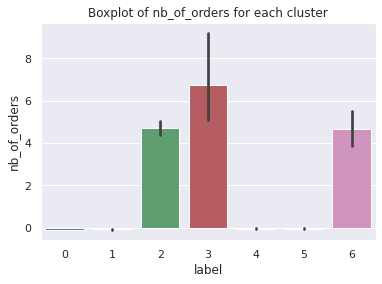

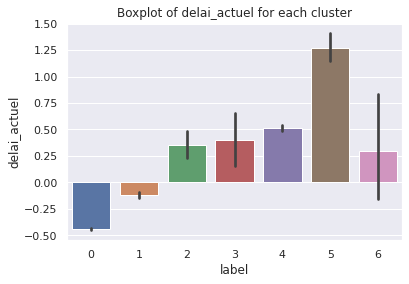

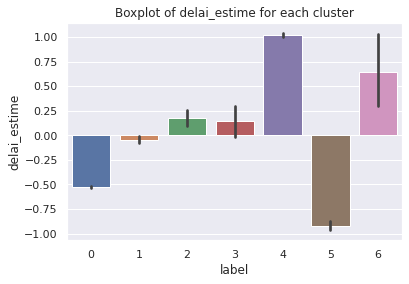

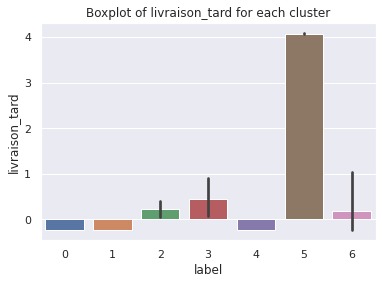

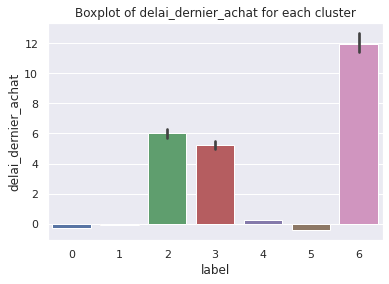

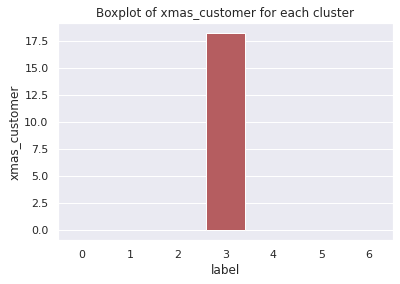

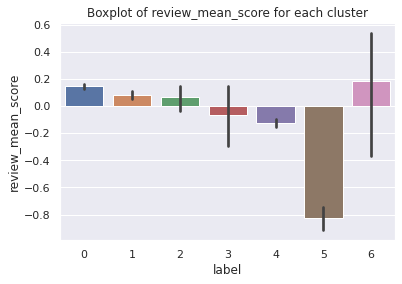

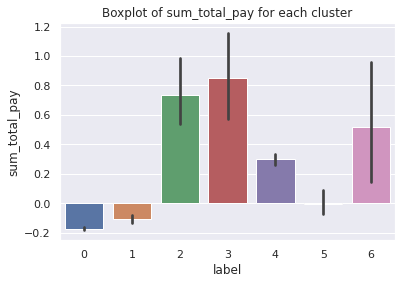

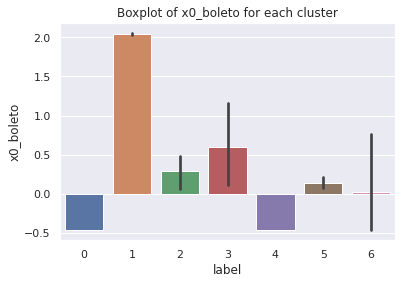

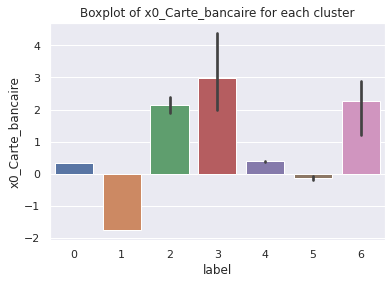

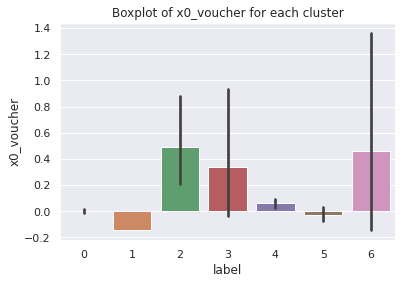

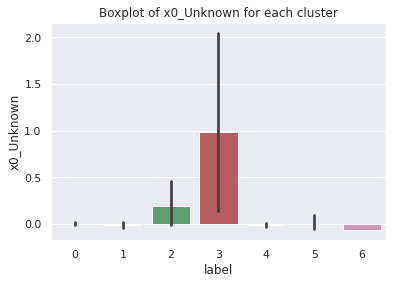

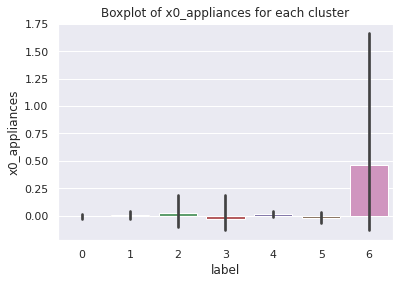

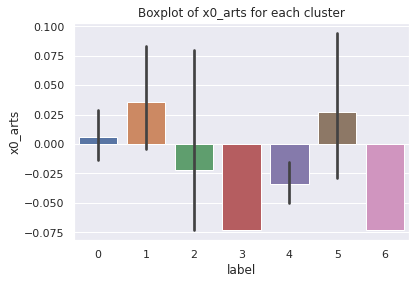

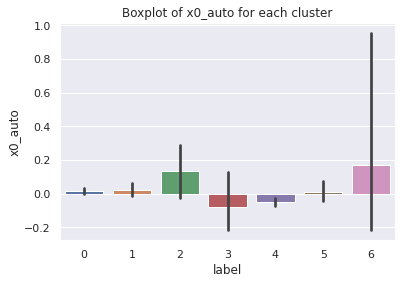

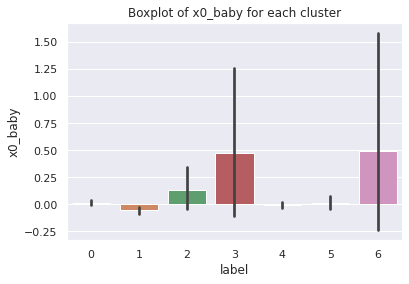

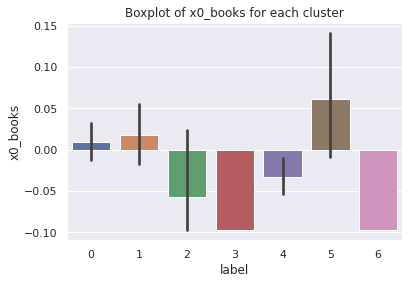

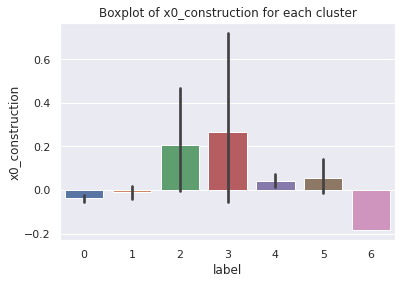

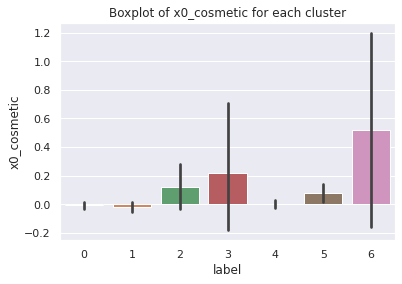

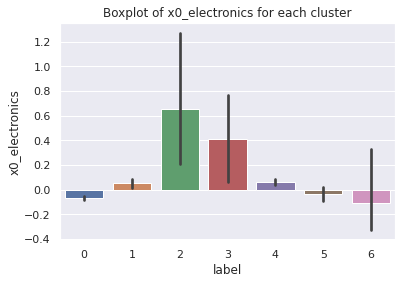

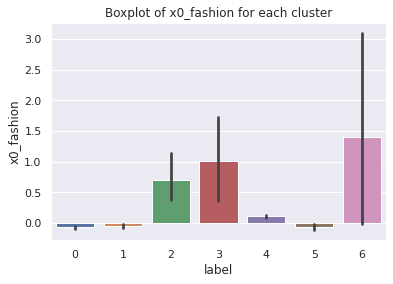

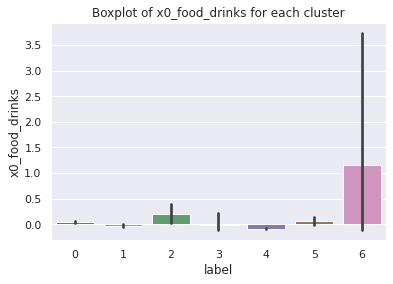

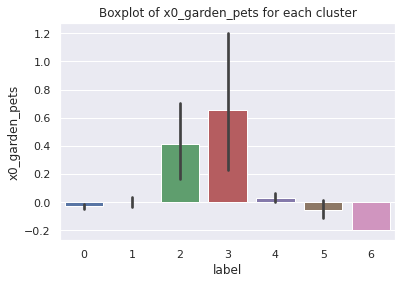

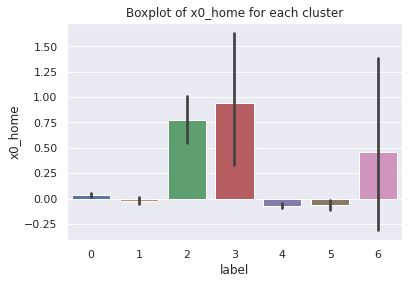

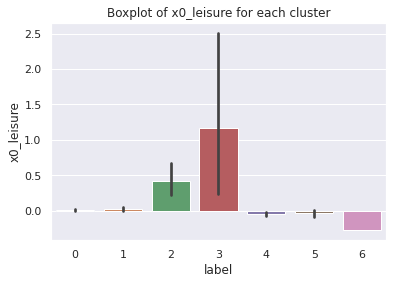

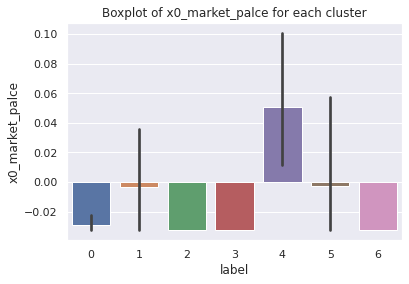

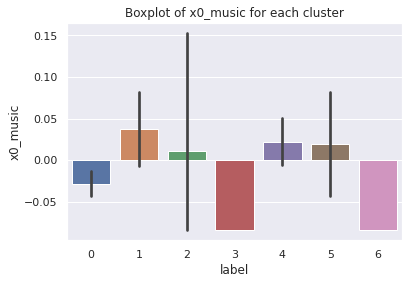

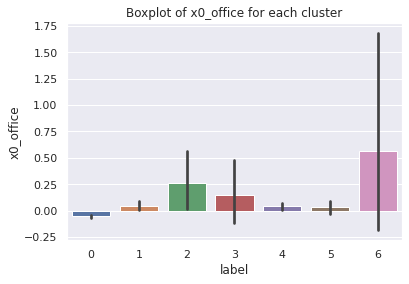

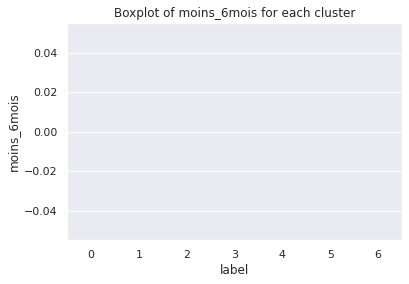

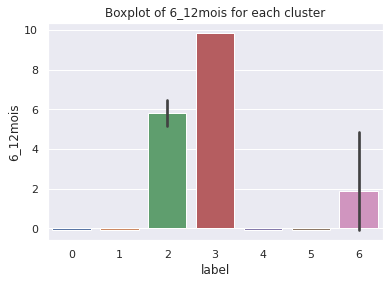

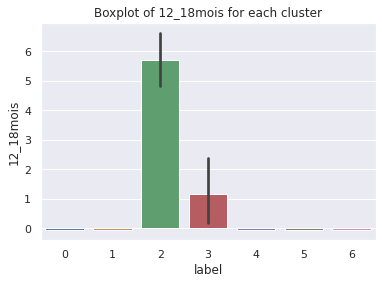

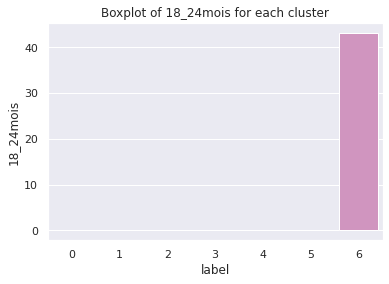

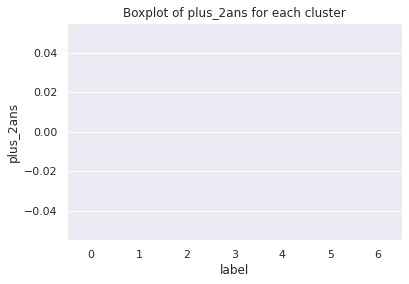

In [ ]:
#cluster_labels pour chaque observation
for col in X1.columns:
  plt.title('Boxplot of {} for each cluster'.format(str(col)))
  sns.barplot(x ='label',y = col,data = X_tot)
  plt.show()

Observ cluster caracteristics for both predicted and new fitted clusters

In [ ]:
#from 29/05/2018 to 05/03/2018
X2=df_finale.iloc[18667:37334,:]
X2=X2.drop(['order_purchase_timestamp'],axis=1)
std = StandardScaler()
numerical_columns = X2.select_dtypes(['int64','float64','uint8']).columns
X2[numerical_columns] = sc.fit_transform(X2[numerical_columns])

In [ ]:
X2.head(4)

,nb_of_orders,delai_actuel,delai_estime,livraison_tard,delai_dernier_achat,xmas_customer,review_mean_score,sum_total_pay,x0_boleto,x0_Carte_bancaire,x0_voucher,x0_Unknown,x0_appliances,x0_arts,x0_auto,x0_baby,x0_books,x0_construction,x0_cosmetic,x0_electronics,x0_fashion,x0_food_drinks,x0_garden_pets,x0_home,x0_leisure,x0_market_palce,x0_music,x0_office,moins_6mois,6_12mois,12_18mois,18_24mois,plus_2ans
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
e39bb16f1f3471cf79798676265d1247,-0.164703,-0.459565,1.344062,-0.350911,-1.251436,-0.062658,0.680546,1.981835,1.966983,-1.827120,-0.136099,-0.104026,-0.146335,-0.070054,-0.213208,-0.232499,-0.102749,-0.153142,-0.339452,-0.382223,2.513305,-0.085467,-0.206092,-0.445624,-0.320320,-0.045371,-0.094456,-0.175144,0.0,-0.11745,-0.074123,-0.027396,0.0
26e4f89a31e7097a127cf4c595573c28,-0.164703,-0.990752,-0.018306,-0.350911,-1.251436,-0.062658,0.680546,-0.414215,-0.472729,0.374742,-0.136099,-0.104026,-0.146335,-0.070054,-0.213208,-0.232499,-0.102749,-0.153142,-0.339452,1.753352,-0.304465,-0.085467,-0.206092,-0.445624,-0.320320,-0.045371,-0.094456,-0.175144,0.0,-0.11745,-0.074123,-0.027396,0.0
9487192740d9b604f250eaf27f37be1f,-0.164703,-0.261082,2.409868,-0.350911,-1.251436,-0.062658,0.680546,-0.351080,-0.472729,0.374742,2.466929,-0.104026,-0.146335,-0.070054,-0.213208,-0.232499,-0.102749,-0.153142,-0.339452,-0.382223,-0.304465,-0.085467,2.989184,-0.445624,-0.320320,-0.045371,-0.094456,-0.175144,0.0,-0.11745,-0.074123,-0.027396,0.0
d5b4fce33a7ef8e6025bff334e6bbf1d,4.458608,-0.625555,0.898553,-0.350911,-0.184402,-0.062658,0.680546,0.257755,-0.472729,0.374742,2.466929,-0.104026,-0.146335,-0.070054,-0.213208,-0.232499,-0.102749,-0.153142,-0.339452,-0.382223,-0.304465,-0.085467,-0.206092,1.088299,2.294199,-0.045371,-0.094456,-0.175144,0.0,-0.11745,-0.074123,-0.027396,0.0


In [ ]:
# K-means n_cluster= 7
label_pred1=kmeans_model2.predict(X2)

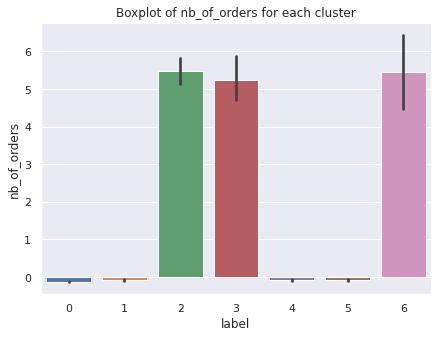

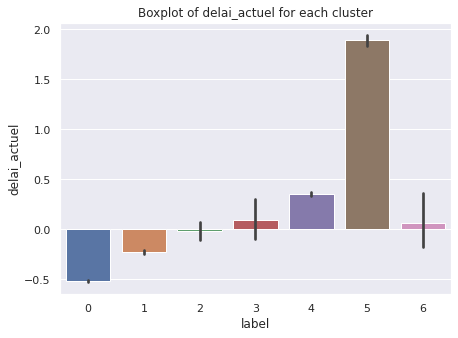

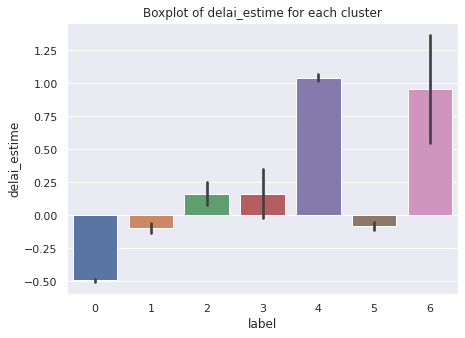

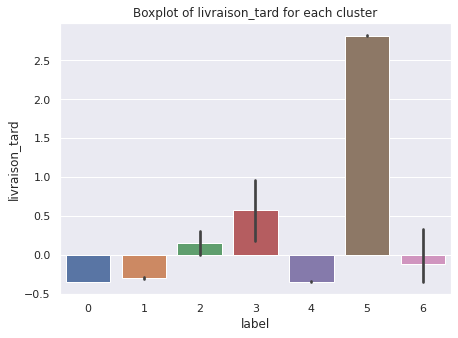

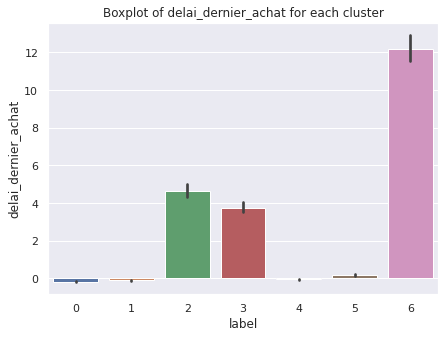

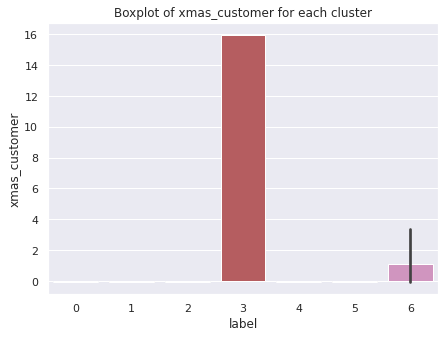

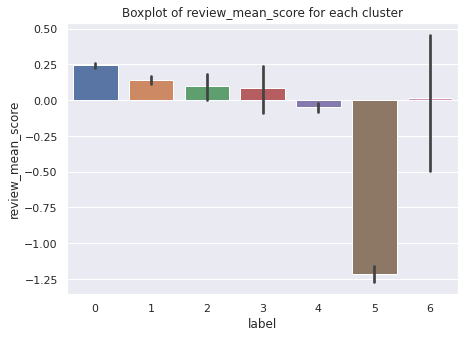

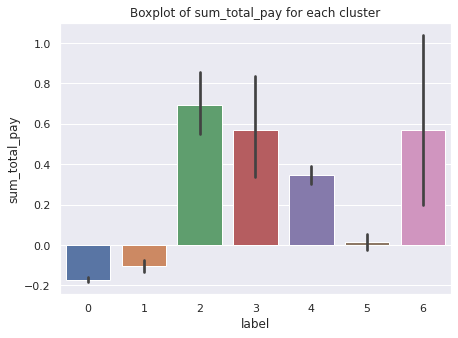

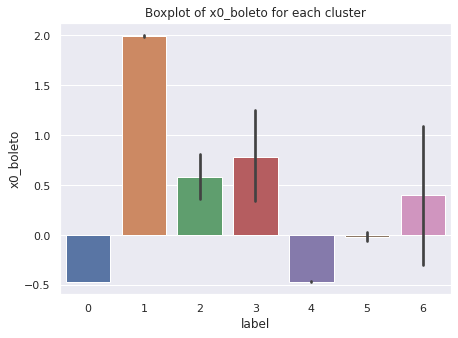

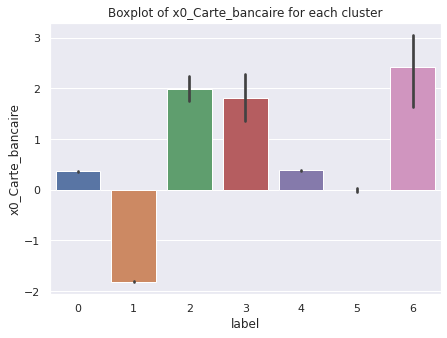

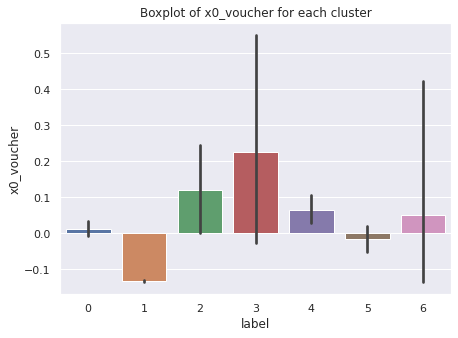

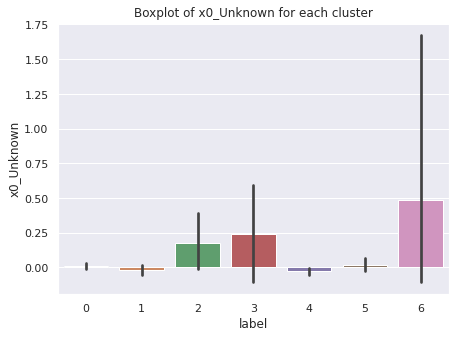

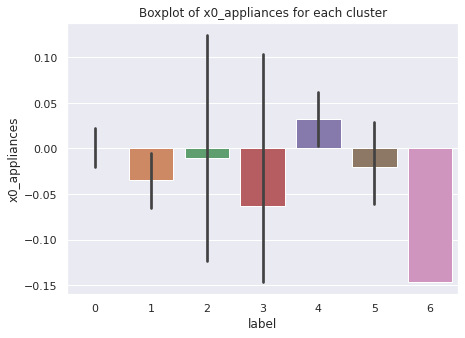

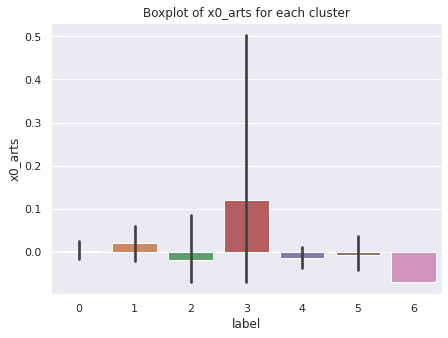

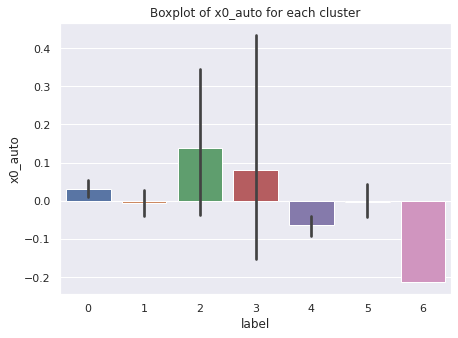

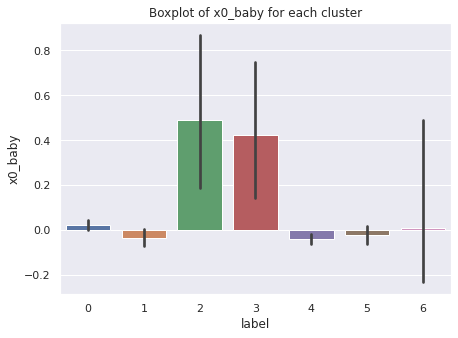

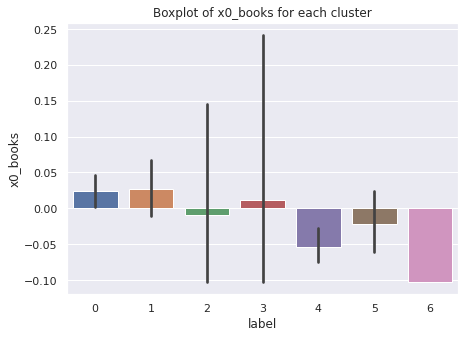

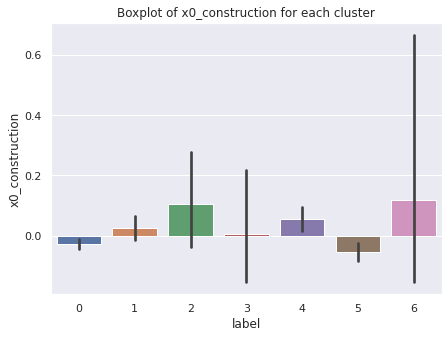

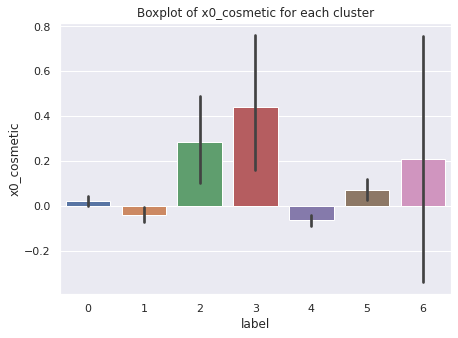

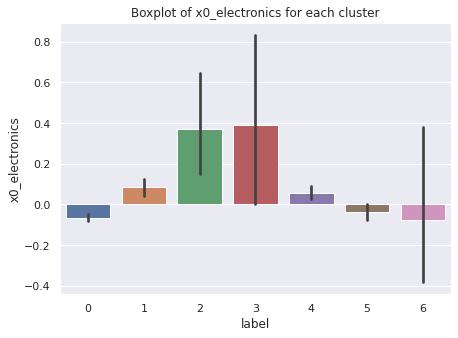

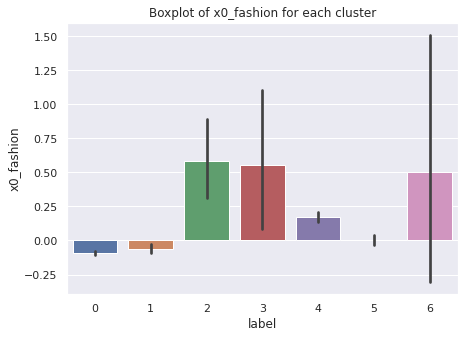

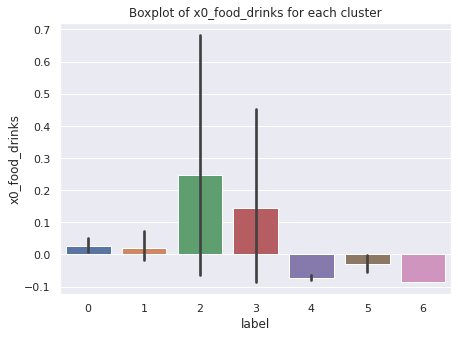

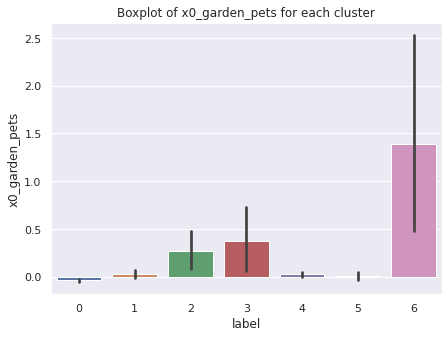

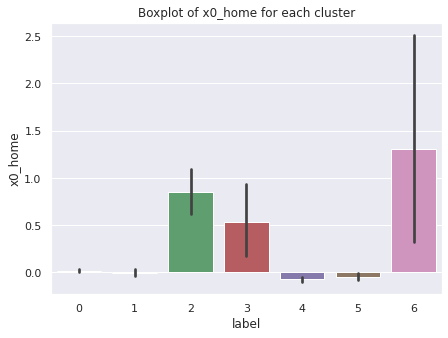

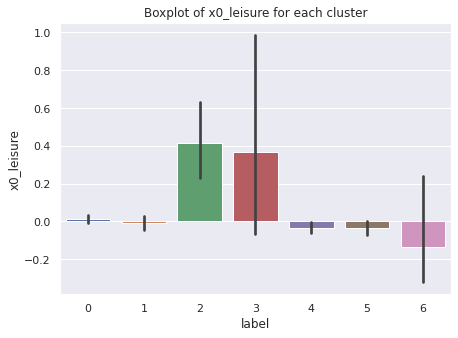

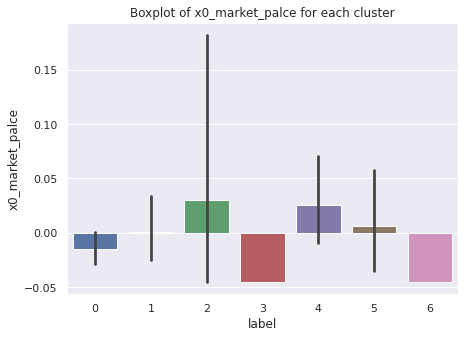

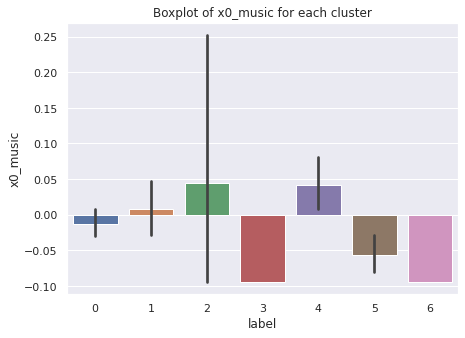

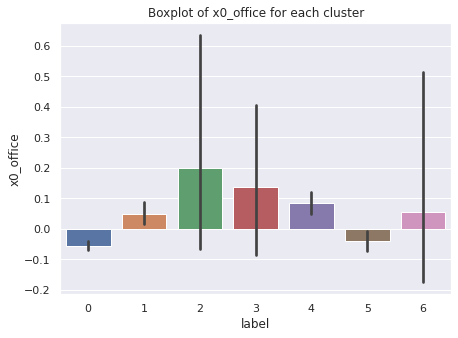

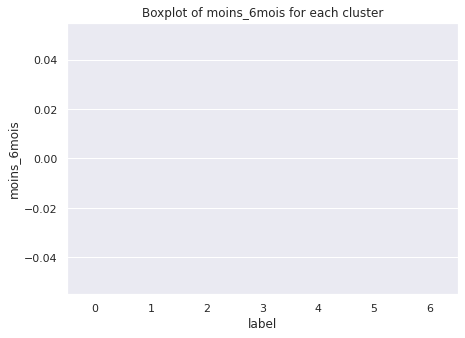

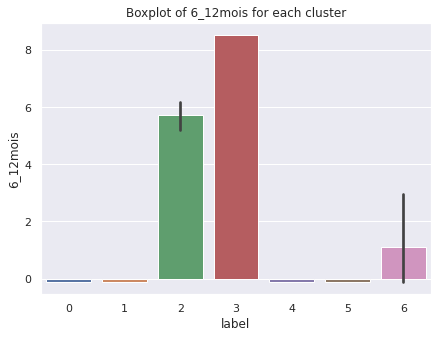

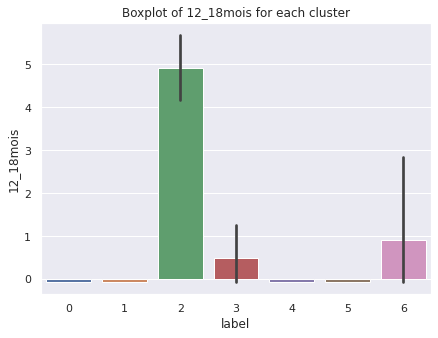

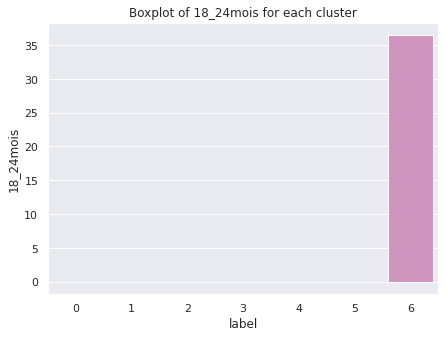

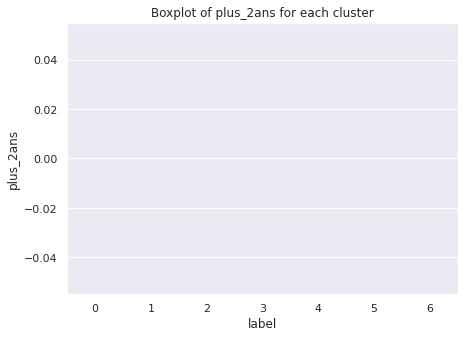

In [ ]:
X2_pred= X2.copy()
X2_pred['label']= label_pred1
for col in X2.columns:
  plt.figure(figsize=(7,5))
  plt.title('Boxplot of {} for each cluster'.format(str(col)) )
  sns.barplot(x = 'label',y = col,data = X2_pred)
  plt.show()

In [ ]:
test_cls = KMeans(n_clusters=7)
X_1=pd.concat([X1,X2])
test_cls.fit(X_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Number of sample by cluster')

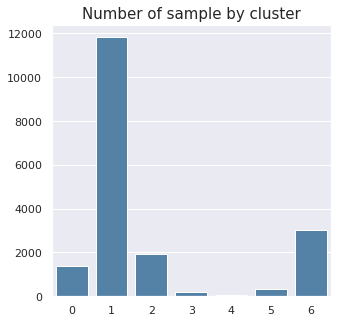

In [ ]:
label_pred2=pd.Series(test_cls.predict(X2))
#label=pd.Series(test_cls.labels_)
plt.figure(figsize=[5,5])
sns.barplot(x=label_pred2.value_counts().sort_index(ascending=True).index,y=label_pred2.value_counts().sort_index(ascending=True).values,color='steelblue')
plt.title('Number of sample by cluster',fontsize=15)

In [ ]:
X2_true= X2.copy()
label_pred2= test_cls.predict(X2)
X2_true['label']= label_pred2

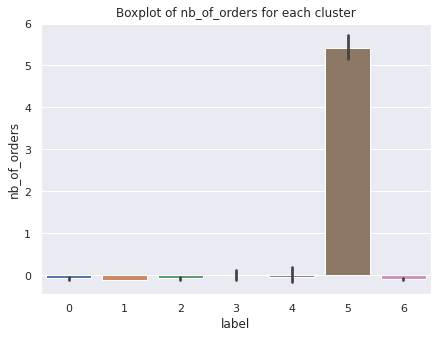

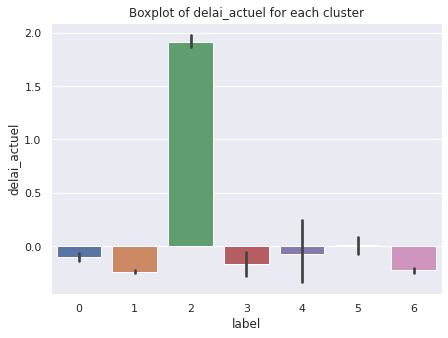

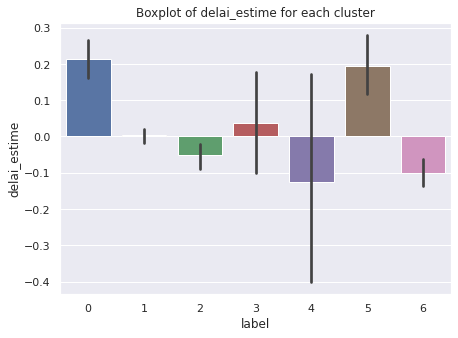

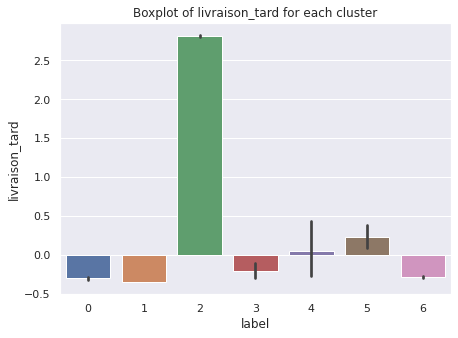

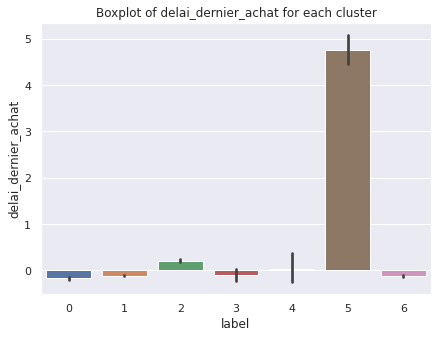

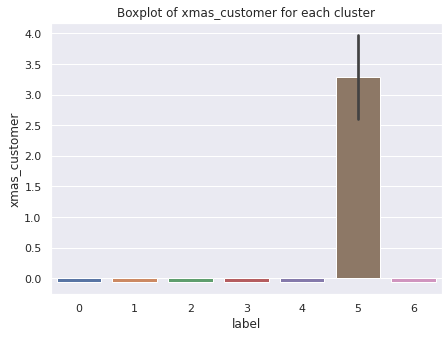

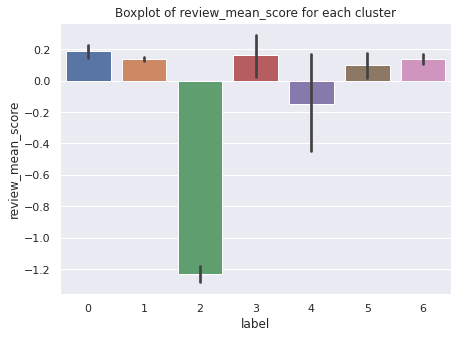

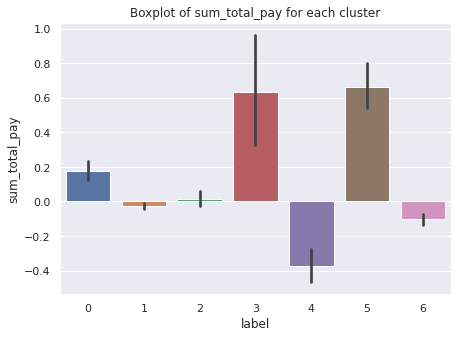

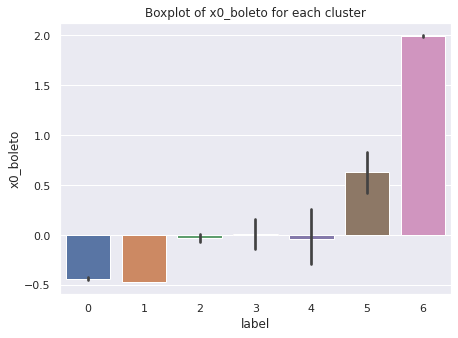

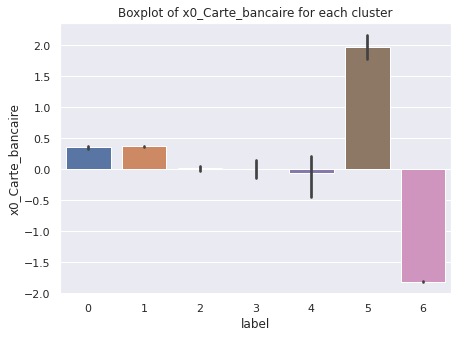

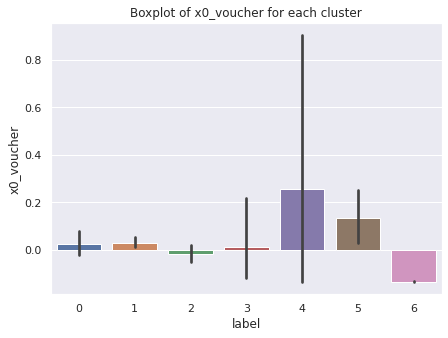

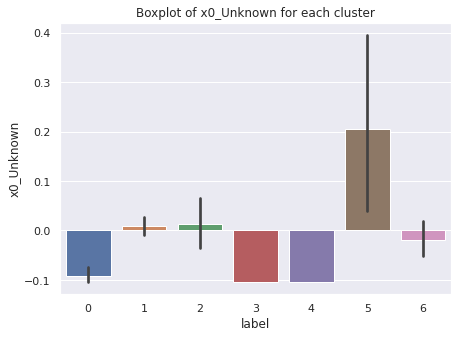

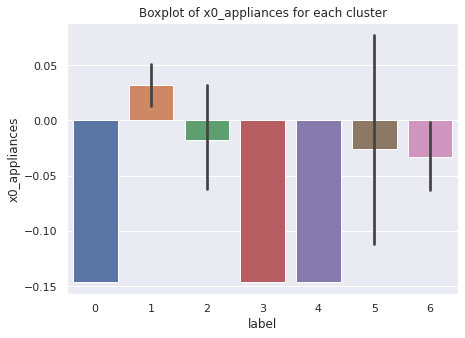

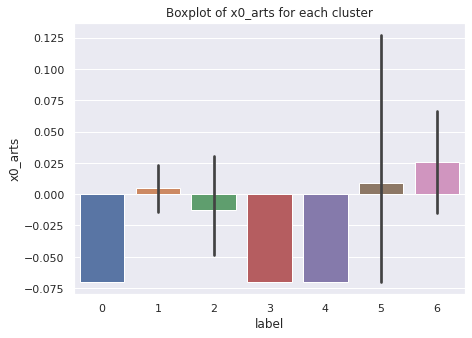

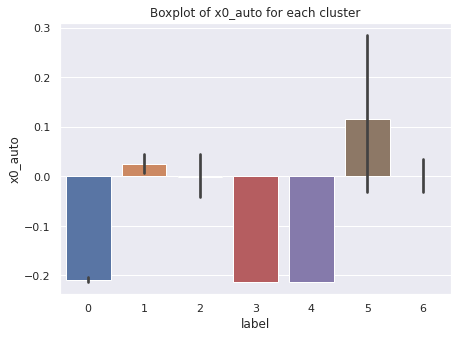

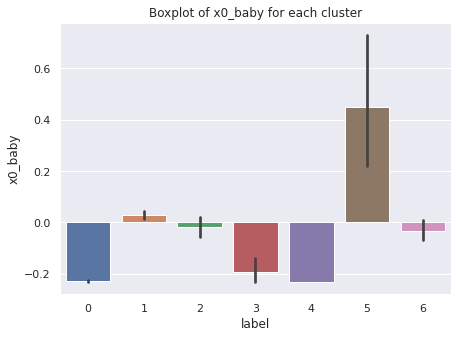

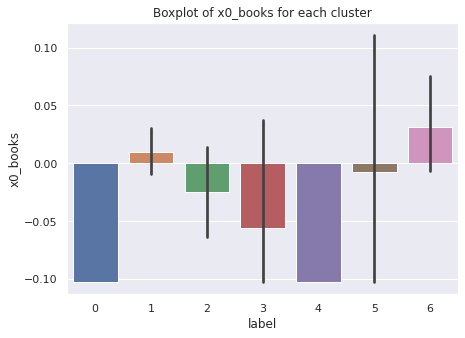

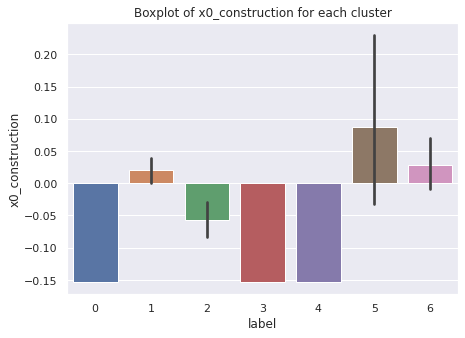

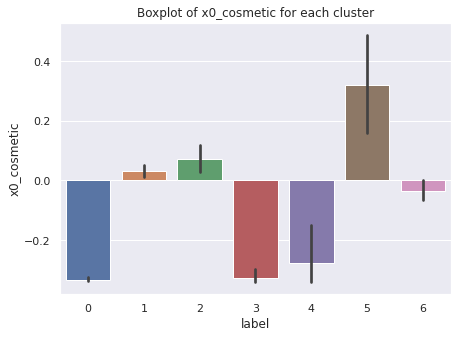

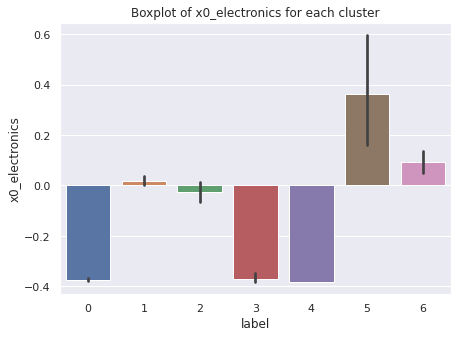

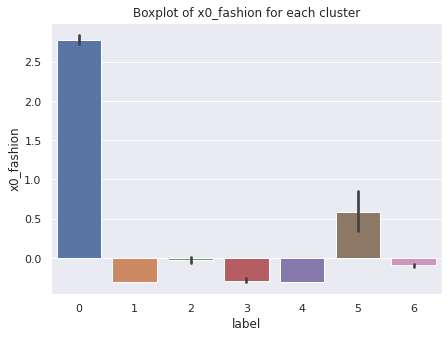

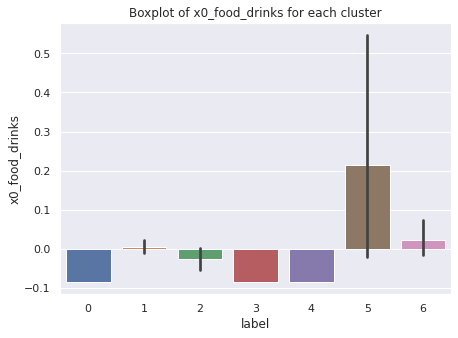

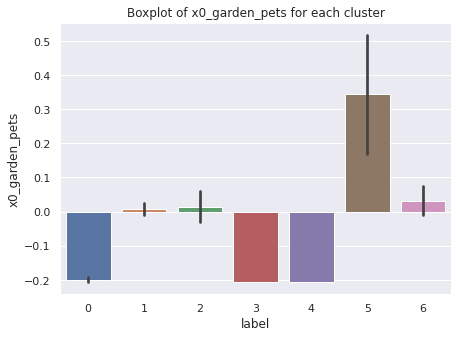

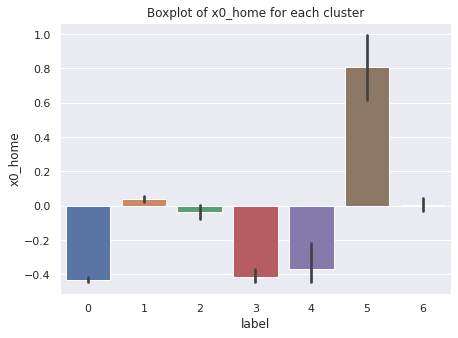

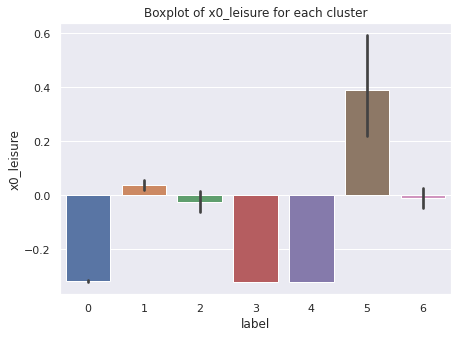

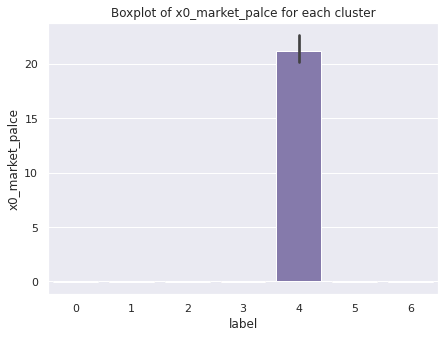

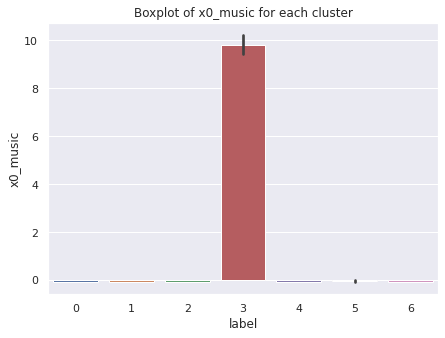

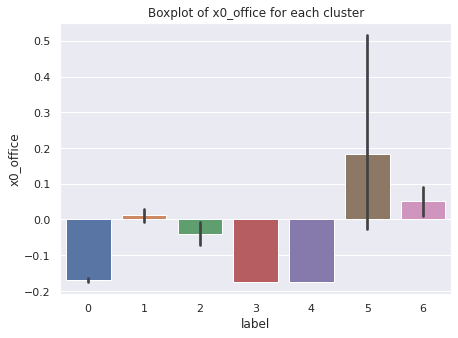

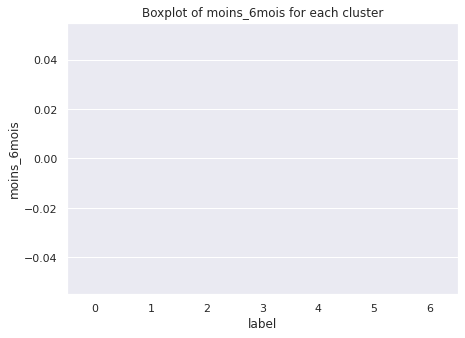

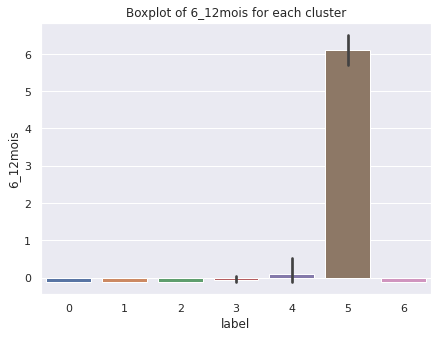

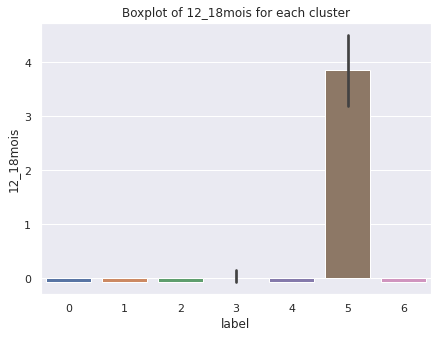

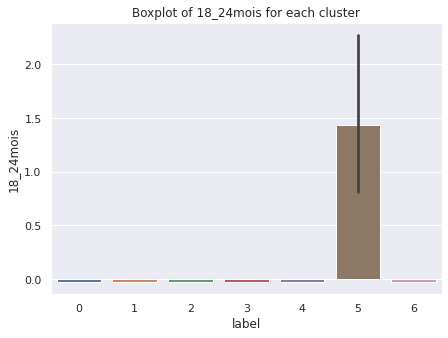

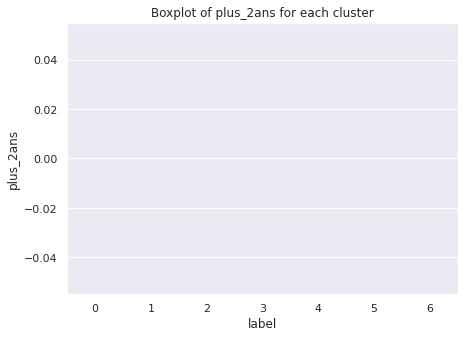

In [ ]:
for col in X2.columns:
  plt.figure(figsize=(7,5))
  plt.title('Boxplot of {} for each cluster'.format(str(col)) )
  sns.barplot(x ='label',y = col,data = X2_true)
  plt.show()

Score de similarite

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
print('Adjusted Rand Score: {}'.format(adjusted_rand_score(label_pred2,label_pred1)))

Adjusted Rand Score: 0.5192315321583107


In [ ]:
df_result= pd.DataFrame({'date': ['05/03/2018'],
    'Adjusted Rand Score':[adjusted_rand_score(label_pred2,label_pred1)]
})
df_result['date'] = pd.to_datetime(df_result['date'])

In [ ]:
df_result

,date,Adjusted Rand Score
0,2018-05-03,0.519232


In [ ]:
#from 04/12/2017 to 05/03/2018
X3=df_finale.iloc[37334:56001,:]
X3=X3.drop(['order_purchase_timestamp'],axis=1)
std = StandardScaler()
numerical_columns = X3.select_dtypes(['int64','float64','uint8']).columns
X3[numerical_columns] = sc.fit_transform(X3[numerical_columns])

In [ ]:
# K-means n_cluster= 7
label_pred1 =kmeans_model2.predict(X3)

In [ ]:
test_cls = KMeans(n_clusters=7)
X_1=pd.concat([X1,X2,X3])
test_cls.fit(X_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Number of sample by cluster')

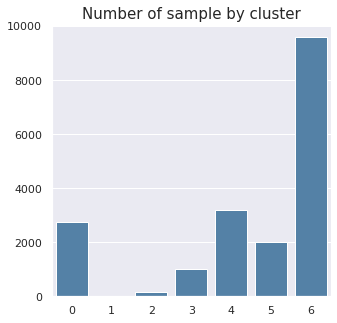

In [ ]:
label_pred2=pd.Series(test_cls.predict(X3))
plt.figure(figsize=[5,5])
sns.barplot(x=label_pred2.value_counts().sort_index(ascending=True).index,y=label_pred2.value_counts().sort_index(ascending=True).values,color='steelblue')
plt.title('Number of sample by cluster',fontsize=15)

In [ ]:
df_result= df_result.append(pd.DataFrame({'date': ['04/12/2017'],
    'Adjusted Rand Score':[adjusted_rand_score(label_pred2,label_pred1)]
}))
df_result['date'] = pd.to_datetime(df_result['date'])

In [ ]:
df_result

,date,Adjusted Rand Score
0,2018-05-03,0.519232
0,2017-04-12,0.414300


In [ ]:
#from 04/12/2017 to 12/08/2017
X4=df_finale.iloc[56001:74668,:]
X4=X4.drop(['order_purchase_timestamp'],axis=1)
std = StandardScaler()
numerical_columns = X4.select_dtypes(['int64','float64','uint8']).columns
X4[numerical_columns] = sc.fit_transform(X4[numerical_columns])

In [ ]:
label_pred1 =pd.Series(kmeans_model2.predict(X4))

In [ ]:
test_cls = KMeans(n_clusters=7)
X_1=pd.concat([X1,X2,X3,X4])
test_cls.fit(X_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Number of sample by cluster')

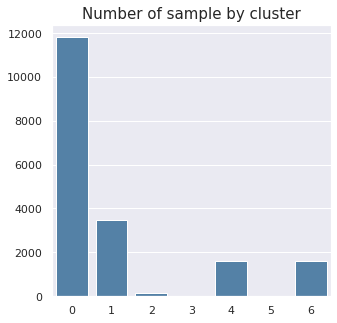

In [ ]:
label_pred2=pd.Series(test_cls.predict(X4))
plt.figure(figsize=[5,5])
sns.barplot(x=label_pred2.value_counts().sort_index(ascending=True).index,y=label_pred2.value_counts().sort_index(ascending=True).values,color='steelblue')
plt.title('Number of sample by cluster',fontsize=15)

In [ ]:
df_result= df_result.append(pd.DataFrame({'date': ['12/08/2017'],
    'Adjusted Rand Score':[adjusted_rand_score(label_pred2,label_pred1)]
}))
df_result['date'] = pd.to_datetime(df_result['date'])

In [ ]:
df_result

,date,Adjusted Rand Score
0,2018-05-03,0.519232
0,2017-04-12,0.414300
0,2017-12-08,0.486364


In [ ]:
#from 12/08/2017 to 03/10/2016
X5=df_finale.iloc[74668:93335,:]
X5=X5.drop(['order_purchase_timestamp'],axis=1)
std = StandardScaler()
numerical_columns = X5.select_dtypes(['int64','float64','uint8']).columns
X5[numerical_columns] = sc.fit_transform(X5[numerical_columns])

In [ ]:
label_pred1 =kmeans_model2.predict(X5)

In [ ]:
test_cls = KMeans(n_clusters=7)
X_1=pd.concat([X1,X2,X3,X4,X5])
test_cls.fit(X_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Number of sample by cluster')

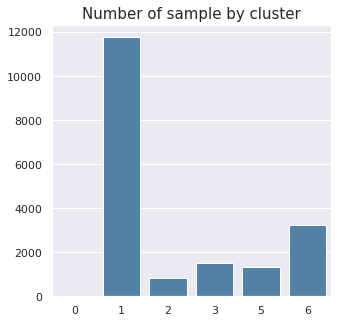

In [ ]:
label_pred2=pd.Series(test_cls.predict(X5))
plt.figure(figsize=[5,5])
sns.barplot(x=label_pred2.value_counts().sort_index(ascending=True).index,y=label_pred2.value_counts().sort_index(ascending=True).values,color='steelblue')
plt.title('Number of sample by cluster',fontsize=15)

In [ ]:
df_result= df_result.append(pd.DataFrame({'date': ['03/10/2016'],
    'Adjusted Rand Score':[adjusted_rand_score(label_pred2,label_pred2)]
}))
df_result['date'] = pd.to_datetime(df_result['date'])

Evoluation au cours du temps

- Cela ce fait en observant la progression de résultats de clustring en augmentant le champ des observations au cours du temps dans le test.

In [ ]:
df_result

,date,Adjusted Rand Score
0,2018-05-03,0.519232
0,2017-04-12,0.414300
0,2017-12-08,0.486364
0,2016-03-10,1.000000


on voit que les clusters évoluent chaque 3 mois : alors il faut actualiser sur une période de 3 mois